- Modified from https://github.com/eriklindernoren/PyTorch-GAN/blob/master/implementations/gan/gan.py

In [9]:
import math
import os

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
n_epochs = 200
batch_size = 64
latent_dim = 100
img_size = 28
channels = 1
sample_interval = 400

In [67]:
os.makedirs("../data/mnist", exist_ok=True)

dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "../data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(img_size), 
             transforms.ToTensor(), 
             transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

In [68]:
sample_img, label = next(iter(dataloader))

In [69]:
class GeneratorLinear(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        def block(in_feature, out_feature, normalize=True):
            layers = [nn.Linear(in_feature, out_feature)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feature))
            layers.append(nn.LeakyReLU(0.1))
            return layers
        
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, img_size * img_size * channels),
            nn.Tanh()
            )
        
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], channels, img_size, img_size)
        return img

In [70]:
class DiscriminatorLinear(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size * img_size * channels, 512),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

In [71]:
# loss and optimizers
adversarial_loss = torch.nn.BCELoss()

generator = GeneratorLinear()
discriminator = DiscriminatorLinear()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=5e-4)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=5e-4)

[Epoch 0/20] [Batch 0/937] [D loss: 0.687177] [G loss: 0.713974]
[Epoch 0/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.657267]
[Epoch 0/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.591929]
[Epoch 0/20] [Batch 3/937] [D loss: 0.636173] [G loss: 0.526554]
[Epoch 0/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.491669]
[Epoch 0/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.431083]
[Epoch 0/20] [Batch 6/937] [D loss: 0.681030] [G loss: 0.376437]
[Epoch 0/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.396039]
[Epoch 0/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.345807]
[Epoch 0/20] [Batch 9/937] [D loss: 0.732732] [G loss: 0.302511]
[Epoch 0/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.373584]
[Epoch 0/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.329749]
[Epoch 0/20] [Batch 12/937] [D loss: 0.737662] [G loss: 0.290523]
[Epoch 0/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.415698]
[Epoch 0/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.369066]
[Epoch 0/2

[Epoch 0/20] [Batch 122/937] [D loss: -1.000000] [G loss: 1.411442]
[Epoch 0/20] [Batch 123/937] [D loss: 0.583975] [G loss: 1.438678]
[Epoch 0/20] [Batch 124/937] [D loss: -1.000000] [G loss: 1.437226]
[Epoch 0/20] [Batch 125/937] [D loss: -1.000000] [G loss: 1.644948]
[Epoch 0/20] [Batch 126/937] [D loss: 0.570592] [G loss: 1.353397]
[Epoch 0/20] [Batch 127/937] [D loss: -1.000000] [G loss: 1.262906]
[Epoch 0/20] [Batch 128/937] [D loss: -1.000000] [G loss: 1.561087]
[Epoch 0/20] [Batch 129/937] [D loss: 0.577734] [G loss: 1.429484]
[Epoch 0/20] [Batch 130/937] [D loss: -1.000000] [G loss: 1.383457]
[Epoch 0/20] [Batch 131/937] [D loss: -1.000000] [G loss: 1.201643]
[Epoch 0/20] [Batch 132/937] [D loss: 0.561654] [G loss: 1.158674]
[Epoch 0/20] [Batch 133/937] [D loss: -1.000000] [G loss: 1.122035]
[Epoch 0/20] [Batch 134/937] [D loss: -1.000000] [G loss: 1.306257]
[Epoch 0/20] [Batch 135/937] [D loss: 0.532604] [G loss: 1.397634]
[Epoch 0/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 0/20] [Batch 243/937] [D loss: 0.800902] [G loss: 0.588575]
[Epoch 0/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.706096]
[Epoch 0/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.649786]
[Epoch 0/20] [Batch 246/937] [D loss: 0.775571] [G loss: 0.654309]
[Epoch 0/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.622234]
[Epoch 0/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.597693]
[Epoch 0/20] [Batch 249/937] [D loss: 0.813594] [G loss: 0.532353]
[Epoch 0/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.596520]
[Epoch 0/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.592338]
[Epoch 0/20] [Batch 252/937] [D loss: 0.754337] [G loss: 0.556258]
[Epoch 0/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.612666]
[Epoch 0/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.569637]
[Epoch 0/20] [Batch 255/937] [D loss: 0.739428] [G loss: 0.524675]
[Epoch 0/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.639744]
[Epoch 0/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 0/20] [Batch 364/937] [D loss: -1.000000] [G loss: 1.048698]
[Epoch 0/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.818543]
[Epoch 0/20] [Batch 366/937] [D loss: 0.824212] [G loss: 0.676832]
[Epoch 0/20] [Batch 367/937] [D loss: -1.000000] [G loss: 1.079511]
[Epoch 0/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.926365]
[Epoch 0/20] [Batch 369/937] [D loss: 0.855178] [G loss: 0.668803]
[Epoch 0/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.902746]
[Epoch 0/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.749767]
[Epoch 0/20] [Batch 372/937] [D loss: 0.811620] [G loss: 0.634536]
[Epoch 0/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.727788]
[Epoch 0/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.562527]
[Epoch 0/20] [Batch 375/937] [D loss: 0.800106] [G loss: 0.504168]
[Epoch 0/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.716823]
[Epoch 0/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.509354]
[Epoch 0/20] [Batch 378/937] [D loss: 0.782102] [G l

[Epoch 0/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.660026]
[Epoch 0/20] [Batch 486/937] [D loss: 0.737209] [G loss: 0.623823]
[Epoch 0/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.725286]
[Epoch 0/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.640086]
[Epoch 0/20] [Batch 489/937] [D loss: 0.766495] [G loss: 0.593171]
[Epoch 0/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.664132]
[Epoch 0/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.614636]
[Epoch 0/20] [Batch 492/937] [D loss: 0.800480] [G loss: 0.602136]
[Epoch 0/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.606458]
[Epoch 0/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.584920]
[Epoch 0/20] [Batch 495/937] [D loss: 0.819155] [G loss: 0.544131]
[Epoch 0/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.570289]
[Epoch 0/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.540777]
[Epoch 0/20] [Batch 498/937] [D loss: 0.824907] [G loss: 0.516183]
[Epoch 0/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 0/20] [Batch 606/937] [D loss: 0.577177] [G loss: 0.802132]
[Epoch 0/20] [Batch 607/937] [D loss: -1.000000] [G loss: 1.173434]
[Epoch 0/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.967138]
[Epoch 0/20] [Batch 609/937] [D loss: 0.507539] [G loss: 0.794510]
[Epoch 0/20] [Batch 610/937] [D loss: -1.000000] [G loss: 1.204711]
[Epoch 0/20] [Batch 611/937] [D loss: -1.000000] [G loss: 1.000433]
[Epoch 0/20] [Batch 612/937] [D loss: 0.513938] [G loss: 0.800715]
[Epoch 0/20] [Batch 613/937] [D loss: -1.000000] [G loss: 1.248717]
[Epoch 0/20] [Batch 614/937] [D loss: -1.000000] [G loss: 1.000703]
[Epoch 0/20] [Batch 615/937] [D loss: 0.591614] [G loss: 0.701769]
[Epoch 0/20] [Batch 616/937] [D loss: -1.000000] [G loss: 1.343021]
[Epoch 0/20] [Batch 617/937] [D loss: -1.000000] [G loss: 1.011981]
[Epoch 0/20] [Batch 618/937] [D loss: 0.674519] [G loss: 0.692655]
[Epoch 0/20] [Batch 619/937] [D loss: -1.000000] [G loss: 1.304142]
[Epoch 0/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 0/20] [Batch 727/937] [D loss: -1.000000] [G loss: 1.618779]
[Epoch 0/20] [Batch 728/937] [D loss: -1.000000] [G loss: 1.637694]
[Epoch 0/20] [Batch 729/937] [D loss: 0.407297] [G loss: 1.285050]
[Epoch 0/20] [Batch 730/937] [D loss: -1.000000] [G loss: 1.966387]
[Epoch 0/20] [Batch 731/937] [D loss: -1.000000] [G loss: 1.606763]
[Epoch 0/20] [Batch 732/937] [D loss: 0.376421] [G loss: 1.432450]
[Epoch 0/20] [Batch 733/937] [D loss: -1.000000] [G loss: 2.056985]
[Epoch 0/20] [Batch 734/937] [D loss: -1.000000] [G loss: 1.822034]
[Epoch 0/20] [Batch 735/937] [D loss: 0.403057] [G loss: 1.334853]
[Epoch 0/20] [Batch 736/937] [D loss: -1.000000] [G loss: 2.080889]
[Epoch 0/20] [Batch 737/937] [D loss: -1.000000] [G loss: 1.786580]
[Epoch 0/20] [Batch 738/937] [D loss: 0.393711] [G loss: 1.645417]
[Epoch 0/20] [Batch 739/937] [D loss: -1.000000] [G loss: 2.233217]
[Epoch 0/20] [Batch 740/937] [D loss: -1.000000] [G loss: 1.995616]
[Epoch 0/20] [Batch 741/937] [D loss: 0.448527] [G l

[Epoch 0/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.954316]
[Epoch 0/20] [Batch 849/937] [D loss: 1.069350] [G loss: 0.784789]
[Epoch 0/20] [Batch 850/937] [D loss: -1.000000] [G loss: 1.066458]
[Epoch 0/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.813045]
[Epoch 0/20] [Batch 852/937] [D loss: 1.024226] [G loss: 0.815164]
[Epoch 0/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.810140]
[Epoch 0/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.768383]
[Epoch 0/20] [Batch 855/937] [D loss: 1.076267] [G loss: 0.552319]
[Epoch 0/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.789113]
[Epoch 0/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.756344]
[Epoch 0/20] [Batch 858/937] [D loss: 1.036866] [G loss: 0.681226]
[Epoch 0/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.669005]
[Epoch 0/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.882524]
[Epoch 0/20] [Batch 861/937] [D loss: 1.027061] [G loss: 0.544919]
[Epoch 0/20] [Batch 862/937] [D loss: -1.000000] [G l

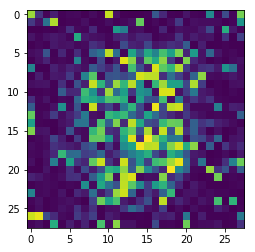

[Epoch 1/20] [Batch 0/937] [D loss: 0.818208] [G loss: 0.755974]
[Epoch 1/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.902146]
[Epoch 1/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.781888]
[Epoch 1/20] [Batch 3/937] [D loss: 0.869485] [G loss: 0.693354]
[Epoch 1/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.733278]
[Epoch 1/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.700260]
[Epoch 1/20] [Batch 6/937] [D loss: 0.881266] [G loss: 0.593511]
[Epoch 1/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.699198]
[Epoch 1/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.675047]
[Epoch 1/20] [Batch 9/937] [D loss: 0.831498] [G loss: 0.583219]
[Epoch 1/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.600710]
[Epoch 1/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.587624]
[Epoch 1/20] [Batch 12/937] [D loss: 0.851589] [G loss: 0.497981]
[Epoch 1/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.595907]
[Epoch 1/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.567801]
[Epoch 1/2

[Epoch 1/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.780859]
[Epoch 1/20] [Batch 123/937] [D loss: 0.578811] [G loss: 0.798870]
[Epoch 1/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.878742]
[Epoch 1/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.792384]
[Epoch 1/20] [Batch 126/937] [D loss: 0.620275] [G loss: 0.768977]
[Epoch 1/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.902283]
[Epoch 1/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.844150]
[Epoch 1/20] [Batch 129/937] [D loss: 0.657277] [G loss: 0.774926]
[Epoch 1/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.875561]
[Epoch 1/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.797035]
[Epoch 1/20] [Batch 132/937] [D loss: 0.676896] [G loss: 0.853986]
[Epoch 1/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.761663]
[Epoch 1/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.728548]
[Epoch 1/20] [Batch 135/937] [D loss: 0.758995] [G loss: 0.739992]
[Epoch 1/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 1/20] [Batch 243/937] [D loss: 0.691793] [G loss: 0.788207]
[Epoch 1/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.798123]
[Epoch 1/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.780215]
[Epoch 1/20] [Batch 246/937] [D loss: 0.712008] [G loss: 0.735798]
[Epoch 1/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.754842]
[Epoch 1/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.738387]
[Epoch 1/20] [Batch 249/937] [D loss: 0.740786] [G loss: 0.704416]
[Epoch 1/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.725029]
[Epoch 1/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.660685]
[Epoch 1/20] [Batch 252/937] [D loss: 0.779106] [G loss: 0.678401]
[Epoch 1/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.655560]
[Epoch 1/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.668326]
[Epoch 1/20] [Batch 255/937] [D loss: 0.792301] [G loss: 0.638321]
[Epoch 1/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.670368]
[Epoch 1/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 1/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.702100]
[Epoch 1/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.680322]
[Epoch 1/20] [Batch 366/937] [D loss: 0.716807] [G loss: 0.670290]
[Epoch 1/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.726751]
[Epoch 1/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.686483]
[Epoch 1/20] [Batch 369/937] [D loss: 0.726060] [G loss: 0.664476]
[Epoch 1/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.740809]
[Epoch 1/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.699265]
[Epoch 1/20] [Batch 372/937] [D loss: 0.739148] [G loss: 0.641895]
[Epoch 1/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.713126]
[Epoch 1/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.701575]
[Epoch 1/20] [Batch 375/937] [D loss: 0.717491] [G loss: 0.663982]
[Epoch 1/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.709075]
[Epoch 1/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.664523]
[Epoch 1/20] [Batch 378/937] [D loss: 0.723196] [G l

[Epoch 1/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.666659]
[Epoch 1/20] [Batch 486/937] [D loss: 0.763590] [G loss: 0.646980]
[Epoch 1/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.691989]
[Epoch 1/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.664097]
[Epoch 1/20] [Batch 489/937] [D loss: 0.748594] [G loss: 0.663660]
[Epoch 1/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.698568]
[Epoch 1/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.672300]
[Epoch 1/20] [Batch 492/937] [D loss: 0.731297] [G loss: 0.667176]
[Epoch 1/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.690316]
[Epoch 1/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.676910]
[Epoch 1/20] [Batch 495/937] [D loss: 0.713182] [G loss: 0.667297]
[Epoch 1/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.707144]
[Epoch 1/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.685751]
[Epoch 1/20] [Batch 498/937] [D loss: 0.707189] [G loss: 0.666383]
[Epoch 1/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 1/20] [Batch 606/937] [D loss: 0.719752] [G loss: 0.690847]
[Epoch 1/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.725041]
[Epoch 1/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.712183]
[Epoch 1/20] [Batch 609/937] [D loss: 0.705599] [G loss: 0.698768]
[Epoch 1/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.732655]
[Epoch 1/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.711378]
[Epoch 1/20] [Batch 612/937] [D loss: 0.693562] [G loss: 0.703192]
[Epoch 1/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.724361]
[Epoch 1/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.709577]
[Epoch 1/20] [Batch 615/937] [D loss: 0.684333] [G loss: 0.703178]
[Epoch 1/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.712015]
[Epoch 1/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.717857]
[Epoch 1/20] [Batch 618/937] [D loss: 0.664800] [G loss: 0.694914]
[Epoch 1/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.717277]
[Epoch 1/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 1/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.831525]
[Epoch 1/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.793777]
[Epoch 1/20] [Batch 729/937] [D loss: 0.619783] [G loss: 0.723306]
[Epoch 1/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.819247]
[Epoch 1/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.741701]
[Epoch 1/20] [Batch 732/937] [D loss: 0.634551] [G loss: 0.712811]
[Epoch 1/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.771581]
[Epoch 1/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.734591]
[Epoch 1/20] [Batch 735/937] [D loss: 0.658965] [G loss: 0.669354]
[Epoch 1/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.760795]
[Epoch 1/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.694862]
[Epoch 1/20] [Batch 738/937] [D loss: 0.667579] [G loss: 0.664634]
[Epoch 1/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.716744]
[Epoch 1/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.699219]
[Epoch 1/20] [Batch 741/937] [D loss: 0.704795] [G l

[Epoch 1/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.786711]
[Epoch 1/20] [Batch 849/937] [D loss: 0.765416] [G loss: 0.712388]
[Epoch 1/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.773866]
[Epoch 1/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.755451]
[Epoch 1/20] [Batch 852/937] [D loss: 0.774916] [G loss: 0.710755]
[Epoch 1/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.699984]
[Epoch 1/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.703447]
[Epoch 1/20] [Batch 855/937] [D loss: 0.813013] [G loss: 0.669025]
[Epoch 1/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.612456]
[Epoch 1/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.613850]
[Epoch 1/20] [Batch 858/937] [D loss: 0.809651] [G loss: 0.583206]
[Epoch 1/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.573997]
[Epoch 1/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.513410]
[Epoch 1/20] [Batch 861/937] [D loss: 0.829160] [G loss: 0.509043]
[Epoch 1/20] [Batch 862/937] [D loss: -1.000000] [G l

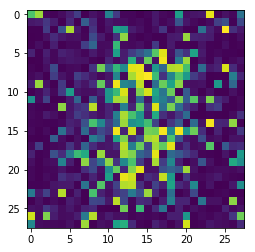

[Epoch 2/20] [Batch 0/937] [D loss: 0.707198] [G loss: 0.671416]
[Epoch 2/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.717885]
[Epoch 2/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.669543]
[Epoch 2/20] [Batch 3/937] [D loss: 0.714134] [G loss: 0.634457]
[Epoch 2/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.683631]
[Epoch 2/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.647861]
[Epoch 2/20] [Batch 6/937] [D loss: 0.732167] [G loss: 0.610469]
[Epoch 2/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.655043]
[Epoch 2/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.632185]
[Epoch 2/20] [Batch 9/937] [D loss: 0.748498] [G loss: 0.580649]
[Epoch 2/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.631656]
[Epoch 2/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.608815]
[Epoch 2/20] [Batch 12/937] [D loss: 0.760422] [G loss: 0.590334]
[Epoch 2/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.687584]
[Epoch 2/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.652157]
[Epoch 2/2

[Epoch 2/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.504440]
[Epoch 2/20] [Batch 123/937] [D loss: 1.217744] [G loss: 0.362761]
[Epoch 2/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.424865]
[Epoch 2/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.421092]
[Epoch 2/20] [Batch 126/937] [D loss: 1.254415] [G loss: 0.338674]
[Epoch 2/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.425724]
[Epoch 2/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.372589]
[Epoch 2/20] [Batch 129/937] [D loss: 1.253083] [G loss: 0.330087]
[Epoch 2/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.375697]
[Epoch 2/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.338783]
[Epoch 2/20] [Batch 132/937] [D loss: 1.259024] [G loss: 0.301964]
[Epoch 2/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.380907]
[Epoch 2/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.340926]
[Epoch 2/20] [Batch 135/937] [D loss: 1.204022] [G loss: 0.307527]
[Epoch 2/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 2/20] [Batch 243/937] [D loss: 0.924559] [G loss: 0.562685]
[Epoch 2/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.687528]
[Epoch 2/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.622472]
[Epoch 2/20] [Batch 246/937] [D loss: 0.889187] [G loss: 0.577974]
[Epoch 2/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.693252]
[Epoch 2/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.675586]
[Epoch 2/20] [Batch 249/937] [D loss: 0.845213] [G loss: 0.538232]
[Epoch 2/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.687344]
[Epoch 2/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.655595]
[Epoch 2/20] [Batch 252/937] [D loss: 0.749601] [G loss: 0.591319]
[Epoch 2/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.728620]
[Epoch 2/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.678598]
[Epoch 2/20] [Batch 255/937] [D loss: 0.739648] [G loss: 0.576204]
[Epoch 2/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.740744]
[Epoch 2/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 2/20] [Batch 364/937] [D loss: -1.000000] [G loss: 1.277225]
[Epoch 2/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.906422]
[Epoch 2/20] [Batch 366/937] [D loss: 0.664226] [G loss: 0.961056]
[Epoch 2/20] [Batch 367/937] [D loss: -1.000000] [G loss: 1.057820]
[Epoch 2/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.770146]
[Epoch 2/20] [Batch 369/937] [D loss: 0.719444] [G loss: 0.642369]
[Epoch 2/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.922011]
[Epoch 2/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.909259]
[Epoch 2/20] [Batch 372/937] [D loss: 0.669651] [G loss: 0.790367]
[Epoch 2/20] [Batch 373/937] [D loss: -1.000000] [G loss: 1.067185]
[Epoch 2/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.845558]
[Epoch 2/20] [Batch 375/937] [D loss: 0.616049] [G loss: 0.825966]
[Epoch 2/20] [Batch 376/937] [D loss: -1.000000] [G loss: 1.223651]
[Epoch 2/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.960115]
[Epoch 2/20] [Batch 378/937] [D loss: 0.663744] [G l

[Epoch 2/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.642727]
[Epoch 2/20] [Batch 486/937] [D loss: 1.313221] [G loss: 0.398654]
[Epoch 2/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.989914]
[Epoch 2/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.784007]
[Epoch 2/20] [Batch 489/937] [D loss: 1.363943] [G loss: 0.329480]
[Epoch 2/20] [Batch 490/937] [D loss: -1.000000] [G loss: 1.601734]
[Epoch 2/20] [Batch 491/937] [D loss: -1.000000] [G loss: 1.075394]
[Epoch 2/20] [Batch 492/937] [D loss: 1.187677] [G loss: 0.443390]
[Epoch 2/20] [Batch 493/937] [D loss: -1.000000] [G loss: 1.311432]
[Epoch 2/20] [Batch 494/937] [D loss: -1.000000] [G loss: 1.092897]
[Epoch 2/20] [Batch 495/937] [D loss: 1.103237] [G loss: 0.519076]
[Epoch 2/20] [Batch 496/937] [D loss: -1.000000] [G loss: 1.555506]
[Epoch 2/20] [Batch 497/937] [D loss: -1.000000] [G loss: 1.271829]
[Epoch 2/20] [Batch 498/937] [D loss: 0.900818] [G loss: 0.691459]
[Epoch 2/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 2/20] [Batch 606/937] [D loss: 1.066329] [G loss: 1.730881]
[Epoch 2/20] [Batch 607/937] [D loss: -1.000000] [G loss: 2.949355]
[Epoch 2/20] [Batch 608/937] [D loss: -1.000000] [G loss: 2.031466]
[Epoch 2/20] [Batch 609/937] [D loss: 1.120893] [G loss: 1.552214]
[Epoch 2/20] [Batch 610/937] [D loss: -1.000000] [G loss: 2.550117]
[Epoch 2/20] [Batch 611/937] [D loss: -1.000000] [G loss: 1.944276]
[Epoch 2/20] [Batch 612/937] [D loss: 1.456156] [G loss: 1.068776]
[Epoch 2/20] [Batch 613/937] [D loss: -1.000000] [G loss: 1.482229]
[Epoch 2/20] [Batch 614/937] [D loss: -1.000000] [G loss: 2.145832]
[Epoch 2/20] [Batch 615/937] [D loss: 1.202209] [G loss: 1.345644]
[Epoch 2/20] [Batch 616/937] [D loss: -1.000000] [G loss: 1.602620]
[Epoch 2/20] [Batch 617/937] [D loss: -1.000000] [G loss: 1.009853]
[Epoch 2/20] [Batch 618/937] [D loss: 1.277968] [G loss: 0.707346]
[Epoch 2/20] [Batch 619/937] [D loss: -1.000000] [G loss: 2.947694]
[Epoch 2/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 2/20] [Batch 727/937] [D loss: -1.000000] [G loss: 1.247532]
[Epoch 2/20] [Batch 728/937] [D loss: -1.000000] [G loss: 1.351270]
[Epoch 2/20] [Batch 729/937] [D loss: 0.582565] [G loss: 1.174873]
[Epoch 2/20] [Batch 730/937] [D loss: -1.000000] [G loss: 1.356302]
[Epoch 2/20] [Batch 731/937] [D loss: -1.000000] [G loss: 1.083074]
[Epoch 2/20] [Batch 732/937] [D loss: 0.603103] [G loss: 0.977850]
[Epoch 2/20] [Batch 733/937] [D loss: -1.000000] [G loss: 1.249377]
[Epoch 2/20] [Batch 734/937] [D loss: -1.000000] [G loss: 1.059587]
[Epoch 2/20] [Batch 735/937] [D loss: 0.569903] [G loss: 0.897236]
[Epoch 2/20] [Batch 736/937] [D loss: -1.000000] [G loss: 1.148579]
[Epoch 2/20] [Batch 737/937] [D loss: -1.000000] [G loss: 1.044066]
[Epoch 2/20] [Batch 738/937] [D loss: 0.552115] [G loss: 0.941452]
[Epoch 2/20] [Batch 739/937] [D loss: -1.000000] [G loss: 1.174166]
[Epoch 2/20] [Batch 740/937] [D loss: -1.000000] [G loss: 1.136329]
[Epoch 2/20] [Batch 741/937] [D loss: 0.552009] [G l

[Epoch 2/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.796872]
[Epoch 2/20] [Batch 849/937] [D loss: 0.852181] [G loss: 0.690067]
[Epoch 2/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.890000]
[Epoch 2/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.777187]
[Epoch 2/20] [Batch 852/937] [D loss: 0.823702] [G loss: 0.713726]
[Epoch 2/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.863328]
[Epoch 2/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.758399]
[Epoch 2/20] [Batch 855/937] [D loss: 0.939014] [G loss: 0.601477]
[Epoch 2/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.752856]
[Epoch 2/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.631866]
[Epoch 2/20] [Batch 858/937] [D loss: 0.946795] [G loss: 0.585382]
[Epoch 2/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.787684]
[Epoch 2/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.695033]
[Epoch 2/20] [Batch 861/937] [D loss: 0.896188] [G loss: 0.643178]
[Epoch 2/20] [Batch 862/937] [D loss: -1.000000] [G l

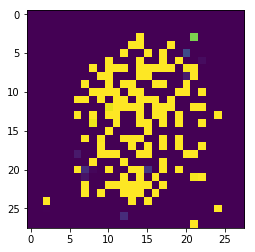

[Epoch 3/20] [Batch 0/937] [D loss: 0.702557] [G loss: 0.985893]
[Epoch 3/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.948955]
[Epoch 3/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.860413]
[Epoch 3/20] [Batch 3/937] [D loss: 0.728442] [G loss: 0.728857]
[Epoch 3/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.851120]
[Epoch 3/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.778051]
[Epoch 3/20] [Batch 6/937] [D loss: 0.699038] [G loss: 0.697247]
[Epoch 3/20] [Batch 7/937] [D loss: -1.000000] [G loss: 1.120759]
[Epoch 3/20] [Batch 8/937] [D loss: -1.000000] [G loss: 1.014053]
[Epoch 3/20] [Batch 9/937] [D loss: 0.711867] [G loss: 0.870224]
[Epoch 3/20] [Batch 10/937] [D loss: -1.000000] [G loss: 1.105682]
[Epoch 3/20] [Batch 11/937] [D loss: -1.000000] [G loss: 1.047643]
[Epoch 3/20] [Batch 12/937] [D loss: 0.646910] [G loss: 1.098615]
[Epoch 3/20] [Batch 13/937] [D loss: -1.000000] [G loss: 1.079473]
[Epoch 3/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.989133]
[Epoch 3/2

[Epoch 3/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.747513]
[Epoch 3/20] [Batch 123/937] [D loss: 0.884087] [G loss: 0.700642]
[Epoch 3/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.816112]
[Epoch 3/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.829269]
[Epoch 3/20] [Batch 126/937] [D loss: 0.886876] [G loss: 0.647388]
[Epoch 3/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.611914]
[Epoch 3/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.511106]
[Epoch 3/20] [Batch 129/937] [D loss: 0.962498] [G loss: 0.459686]
[Epoch 3/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.498407]
[Epoch 3/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.446464]
[Epoch 3/20] [Batch 132/937] [D loss: 0.992736] [G loss: 0.379015]
[Epoch 3/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.643998]
[Epoch 3/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.516401]
[Epoch 3/20] [Batch 135/937] [D loss: 0.912528] [G loss: 0.509711]
[Epoch 3/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 3/20] [Batch 243/937] [D loss: 0.835157] [G loss: 0.574390]
[Epoch 3/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.648317]
[Epoch 3/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.577366]
[Epoch 3/20] [Batch 246/937] [D loss: 0.806538] [G loss: 0.537063]
[Epoch 3/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.645943]
[Epoch 3/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.601772]
[Epoch 3/20] [Batch 249/937] [D loss: 0.778518] [G loss: 0.534265]
[Epoch 3/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.652923]
[Epoch 3/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.631236]
[Epoch 3/20] [Batch 252/937] [D loss: 0.771637] [G loss: 0.560695]
[Epoch 3/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.724648]
[Epoch 3/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.661588]
[Epoch 3/20] [Batch 255/937] [D loss: 0.812474] [G loss: 0.567235]
[Epoch 3/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.734388]
[Epoch 3/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 3/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.737812]
[Epoch 3/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.656063]
[Epoch 3/20] [Batch 366/937] [D loss: 0.902298] [G loss: 0.636346]
[Epoch 3/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.955598]
[Epoch 3/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.725827]
[Epoch 3/20] [Batch 369/937] [D loss: 0.878624] [G loss: 0.673723]
[Epoch 3/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.856895]
[Epoch 3/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.723422]
[Epoch 3/20] [Batch 372/937] [D loss: 0.898223] [G loss: 0.587111]
[Epoch 3/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.691507]
[Epoch 3/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.648463]
[Epoch 3/20] [Batch 375/937] [D loss: 0.875061] [G loss: 0.546148]
[Epoch 3/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.573598]
[Epoch 3/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.641055]
[Epoch 3/20] [Batch 378/937] [D loss: 0.761446] [G l

[Epoch 3/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.613338]
[Epoch 3/20] [Batch 486/937] [D loss: 0.741629] [G loss: 0.620089]
[Epoch 3/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.805648]
[Epoch 3/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.657836]
[Epoch 3/20] [Batch 489/937] [D loss: 0.740234] [G loss: 0.612291]
[Epoch 3/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.814302]
[Epoch 3/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.684709]
[Epoch 3/20] [Batch 492/937] [D loss: 0.726808] [G loss: 0.610489]
[Epoch 3/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.804649]
[Epoch 3/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.714770]
[Epoch 3/20] [Batch 495/937] [D loss: 0.676179] [G loss: 0.622878]
[Epoch 3/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.857667]
[Epoch 3/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.762354]
[Epoch 3/20] [Batch 498/937] [D loss: 0.645884] [G loss: 0.667701]
[Epoch 3/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 3/20] [Batch 606/937] [D loss: 0.898961] [G loss: 0.831346]
[Epoch 3/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.842203]
[Epoch 3/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.801860]
[Epoch 3/20] [Batch 609/937] [D loss: 0.945717] [G loss: 0.685636]
[Epoch 3/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.838123]
[Epoch 3/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.789162]
[Epoch 3/20] [Batch 612/937] [D loss: 0.876866] [G loss: 0.649571]
[Epoch 3/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.946794]
[Epoch 3/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.854676]
[Epoch 3/20] [Batch 615/937] [D loss: 0.813558] [G loss: 0.710034]
[Epoch 3/20] [Batch 616/937] [D loss: -1.000000] [G loss: 1.000999]
[Epoch 3/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.865169]
[Epoch 3/20] [Batch 618/937] [D loss: 0.836761] [G loss: 0.769477]
[Epoch 3/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.990736]
[Epoch 3/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 3/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.835172]
[Epoch 3/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.731064]
[Epoch 3/20] [Batch 729/937] [D loss: 0.696054] [G loss: 0.684153]
[Epoch 3/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.886922]
[Epoch 3/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.706015]
[Epoch 3/20] [Batch 732/937] [D loss: 0.638988] [G loss: 0.755140]
[Epoch 3/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.876953]
[Epoch 3/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.800481]
[Epoch 3/20] [Batch 735/937] [D loss: 0.737149] [G loss: 0.653543]
[Epoch 3/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.920344]
[Epoch 3/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.900262]
[Epoch 3/20] [Batch 738/937] [D loss: 0.657783] [G loss: 0.922290]
[Epoch 3/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.985755]
[Epoch 3/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.904060]
[Epoch 3/20] [Batch 741/937] [D loss: 0.727411] [G l

[Epoch 3/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.438518]
[Epoch 3/20] [Batch 849/937] [D loss: 1.261586] [G loss: 0.378426]
[Epoch 3/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.473372]
[Epoch 3/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.461703]
[Epoch 3/20] [Batch 852/937] [D loss: 1.246007] [G loss: 0.417066]
[Epoch 3/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.486452]
[Epoch 3/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.441199]
[Epoch 3/20] [Batch 855/937] [D loss: 1.214614] [G loss: 0.390749]
[Epoch 3/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.458986]
[Epoch 3/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.379026]
[Epoch 3/20] [Batch 858/937] [D loss: 1.288427] [G loss: 0.336460]
[Epoch 3/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.375309]
[Epoch 3/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.364100]
[Epoch 3/20] [Batch 861/937] [D loss: 1.139076] [G loss: 0.491932]
[Epoch 3/20] [Batch 862/937] [D loss: -1.000000] [G l

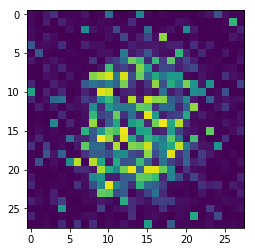

[Epoch 4/20] [Batch 0/937] [D loss: 0.837332] [G loss: 0.455701]
[Epoch 4/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.604930]
[Epoch 4/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.584307]
[Epoch 4/20] [Batch 3/937] [D loss: 0.836015] [G loss: 0.491092]
[Epoch 4/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.683123]
[Epoch 4/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.620689]
[Epoch 4/20] [Batch 6/937] [D loss: 0.863201] [G loss: 0.479758]
[Epoch 4/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.670128]
[Epoch 4/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.571296]
[Epoch 4/20] [Batch 9/937] [D loss: 0.855654] [G loss: 0.566975]
[Epoch 4/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.673077]
[Epoch 4/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.566927]
[Epoch 4/20] [Batch 12/937] [D loss: 0.898878] [G loss: 0.498444]
[Epoch 4/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.512226]
[Epoch 4/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.462225]
[Epoch 4/2

[Epoch 4/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.960908]
[Epoch 4/20] [Batch 123/937] [D loss: 0.897089] [G loss: 0.763434]
[Epoch 4/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.998519]
[Epoch 4/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.748044]
[Epoch 4/20] [Batch 126/937] [D loss: 0.941112] [G loss: 0.527325]
[Epoch 4/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.882909]
[Epoch 4/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.547464]
[Epoch 4/20] [Batch 129/937] [D loss: 1.019787] [G loss: 0.410910]
[Epoch 4/20] [Batch 130/937] [D loss: -1.000000] [G loss: 1.018587]
[Epoch 4/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.611769]
[Epoch 4/20] [Batch 132/937] [D loss: 1.018745] [G loss: 0.544736]
[Epoch 4/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.852594]
[Epoch 4/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.785265]
[Epoch 4/20] [Batch 135/937] [D loss: 1.132087] [G loss: 0.499647]
[Epoch 4/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 4/20] [Batch 243/937] [D loss: 1.014673] [G loss: 0.508087]
[Epoch 4/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.651621]
[Epoch 4/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.536130]
[Epoch 4/20] [Batch 246/937] [D loss: 0.999892] [G loss: 0.513486]
[Epoch 4/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.708827]
[Epoch 4/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.587960]
[Epoch 4/20] [Batch 249/937] [D loss: 0.956581] [G loss: 0.600076]
[Epoch 4/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.743149]
[Epoch 4/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.709470]
[Epoch 4/20] [Batch 252/937] [D loss: 0.920706] [G loss: 0.568667]
[Epoch 4/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.843447]
[Epoch 4/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.709386]
[Epoch 4/20] [Batch 255/937] [D loss: 0.910082] [G loss: 0.593500]
[Epoch 4/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.803723]
[Epoch 4/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 4/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.598524]
[Epoch 4/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.574434]
[Epoch 4/20] [Batch 366/937] [D loss: 0.989919] [G loss: 0.498713]
[Epoch 4/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.523867]
[Epoch 4/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.473117]
[Epoch 4/20] [Batch 369/937] [D loss: 1.012136] [G loss: 0.430141]
[Epoch 4/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.451735]
[Epoch 4/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.399818]
[Epoch 4/20] [Batch 372/937] [D loss: 1.045785] [G loss: 0.408332]
[Epoch 4/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.474902]
[Epoch 4/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.506976]
[Epoch 4/20] [Batch 375/937] [D loss: 1.095736] [G loss: 0.415987]
[Epoch 4/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.598951]
[Epoch 4/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.451578]
[Epoch 4/20] [Batch 378/937] [D loss: 1.150679] [G l

[Epoch 4/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.533367]
[Epoch 4/20] [Batch 486/937] [D loss: 0.920334] [G loss: 0.532934]
[Epoch 4/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.544514]
[Epoch 4/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.584997]
[Epoch 4/20] [Batch 489/937] [D loss: 0.921329] [G loss: 0.511368]
[Epoch 4/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.571016]
[Epoch 4/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.548200]
[Epoch 4/20] [Batch 492/937] [D loss: 0.898943] [G loss: 0.488855]
[Epoch 4/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.625948]
[Epoch 4/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.612437]
[Epoch 4/20] [Batch 495/937] [D loss: 0.934162] [G loss: 0.568663]
[Epoch 4/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.629094]
[Epoch 4/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.590757]
[Epoch 4/20] [Batch 498/937] [D loss: 0.918156] [G loss: 0.553074]
[Epoch 4/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 4/20] [Batch 606/937] [D loss: 0.942826] [G loss: 0.589897]
[Epoch 4/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.541113]
[Epoch 4/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.498643]
[Epoch 4/20] [Batch 609/937] [D loss: 0.963372] [G loss: 0.483851]
[Epoch 4/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.483638]
[Epoch 4/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.477768]
[Epoch 4/20] [Batch 612/937] [D loss: 1.003995] [G loss: 0.444024]
[Epoch 4/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.503037]
[Epoch 4/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.471393]
[Epoch 4/20] [Batch 615/937] [D loss: 1.018856] [G loss: 0.445235]
[Epoch 4/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.527090]
[Epoch 4/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.496397]
[Epoch 4/20] [Batch 618/937] [D loss: 1.053380] [G loss: 0.454254]
[Epoch 4/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.500513]
[Epoch 4/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 4/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.539594]
[Epoch 4/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.478660]
[Epoch 4/20] [Batch 729/937] [D loss: 0.937614] [G loss: 0.471335]
[Epoch 4/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.487066]
[Epoch 4/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.474665]
[Epoch 4/20] [Batch 732/937] [D loss: 0.966740] [G loss: 0.436229]
[Epoch 4/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.444980]
[Epoch 4/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.444226]
[Epoch 4/20] [Batch 735/937] [D loss: 0.968176] [G loss: 0.442823]
[Epoch 4/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.471032]
[Epoch 4/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.441313]
[Epoch 4/20] [Batch 738/937] [D loss: 0.982572] [G loss: 0.441323]
[Epoch 4/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.450829]
[Epoch 4/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.436194]
[Epoch 4/20] [Batch 741/937] [D loss: 0.966032] [G l

[Epoch 4/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.610279]
[Epoch 4/20] [Batch 849/937] [D loss: 0.742463] [G loss: 0.605319]
[Epoch 4/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.620514]
[Epoch 4/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.618155]
[Epoch 4/20] [Batch 852/937] [D loss: 0.734057] [G loss: 0.608311]
[Epoch 4/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.660578]
[Epoch 4/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.642682]
[Epoch 4/20] [Batch 855/937] [D loss: 0.733136] [G loss: 0.636506]
[Epoch 4/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.673281]
[Epoch 4/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.646711]
[Epoch 4/20] [Batch 858/937] [D loss: 0.716072] [G loss: 0.645398]
[Epoch 4/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.679760]
[Epoch 4/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.664497]
[Epoch 4/20] [Batch 861/937] [D loss: 0.712686] [G loss: 0.656233]
[Epoch 4/20] [Batch 862/937] [D loss: -1.000000] [G l

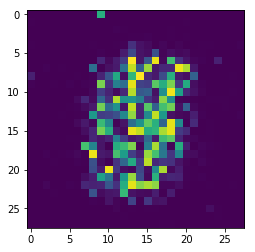

[Epoch 5/20] [Batch 0/937] [D loss: 0.714980] [G loss: 0.696767]
[Epoch 5/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.675711]
[Epoch 5/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.664241]
[Epoch 5/20] [Batch 3/937] [D loss: 0.718738] [G loss: 0.647508]
[Epoch 5/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.648999]
[Epoch 5/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.649491]
[Epoch 5/20] [Batch 6/937] [D loss: 0.723545] [G loss: 0.625569]
[Epoch 5/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.628628]
[Epoch 5/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.627019]
[Epoch 5/20] [Batch 9/937] [D loss: 0.719297] [G loss: 0.628867]
[Epoch 5/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.648266]
[Epoch 5/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.627524]
[Epoch 5/20] [Batch 12/937] [D loss: 0.724404] [G loss: 0.648524]
[Epoch 5/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.662825]
[Epoch 5/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.678860]
[Epoch 5/2

[Epoch 5/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.676094]
[Epoch 5/20] [Batch 123/937] [D loss: 0.732969] [G loss: 0.672179]
[Epoch 5/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.683925]
[Epoch 5/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.675444]
[Epoch 5/20] [Batch 126/937] [D loss: 0.735987] [G loss: 0.670444]
[Epoch 5/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.683795]
[Epoch 5/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.671492]
[Epoch 5/20] [Batch 129/937] [D loss: 0.745855] [G loss: 0.661359]
[Epoch 5/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.668659]
[Epoch 5/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.673619]
[Epoch 5/20] [Batch 132/937] [D loss: 0.747577] [G loss: 0.652969]
[Epoch 5/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.647523]
[Epoch 5/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.650876]
[Epoch 5/20] [Batch 135/937] [D loss: 0.748951] [G loss: 0.639558]
[Epoch 5/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 5/20] [Batch 243/937] [D loss: 0.702089] [G loss: 0.672316]
[Epoch 5/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.693021]
[Epoch 5/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.704194]
[Epoch 5/20] [Batch 246/937] [D loss: 0.702159] [G loss: 0.682173]
[Epoch 5/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.719369]
[Epoch 5/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.710115]
[Epoch 5/20] [Batch 249/937] [D loss: 0.691002] [G loss: 0.711363]
[Epoch 5/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.750142]
[Epoch 5/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.731829]
[Epoch 5/20] [Batch 252/937] [D loss: 0.684707] [G loss: 0.727335]
[Epoch 5/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.754564]
[Epoch 5/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.758844]
[Epoch 5/20] [Batch 255/937] [D loss: 0.679892] [G loss: 0.751445]
[Epoch 5/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.729546]
[Epoch 5/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 5/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.672878]
[Epoch 5/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.663973]
[Epoch 5/20] [Batch 366/937] [D loss: 0.678113] [G loss: 0.660840]
[Epoch 5/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.691576]
[Epoch 5/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.692394]
[Epoch 5/20] [Batch 369/937] [D loss: 0.673065] [G loss: 0.686633]
[Epoch 5/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.727025]
[Epoch 5/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.723633]
[Epoch 5/20] [Batch 372/937] [D loss: 0.668947] [G loss: 0.718008]
[Epoch 5/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.743841]
[Epoch 5/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.739422]
[Epoch 5/20] [Batch 375/937] [D loss: 0.661121] [G loss: 0.736060]
[Epoch 5/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.738347]
[Epoch 5/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.732055]
[Epoch 5/20] [Batch 378/937] [D loss: 0.652652] [G l

[Epoch 5/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.628019]
[Epoch 5/20] [Batch 486/937] [D loss: 0.791861] [G loss: 0.635009]
[Epoch 5/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.628094]
[Epoch 5/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.621511]
[Epoch 5/20] [Batch 489/937] [D loss: 0.786948] [G loss: 0.633023]
[Epoch 5/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.620251]
[Epoch 5/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.625554]
[Epoch 5/20] [Batch 492/937] [D loss: 0.796964] [G loss: 0.605730]
[Epoch 5/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.635595]
[Epoch 5/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.616977]
[Epoch 5/20] [Batch 495/937] [D loss: 0.789498] [G loss: 0.605957]
[Epoch 5/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.648395]
[Epoch 5/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.618917]
[Epoch 5/20] [Batch 498/937] [D loss: 0.783763] [G loss: 0.616333]
[Epoch 5/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 5/20] [Batch 606/937] [D loss: 0.721607] [G loss: 0.666608]
[Epoch 5/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.695020]
[Epoch 5/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.696196]
[Epoch 5/20] [Batch 609/937] [D loss: 0.718306] [G loss: 0.687197]
[Epoch 5/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.701228]
[Epoch 5/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.694015]
[Epoch 5/20] [Batch 612/937] [D loss: 0.715007] [G loss: 0.687806]
[Epoch 5/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.692571]
[Epoch 5/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.683231]
[Epoch 5/20] [Batch 615/937] [D loss: 0.710223] [G loss: 0.679065]
[Epoch 5/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.679383]
[Epoch 5/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.676989]
[Epoch 5/20] [Batch 618/937] [D loss: 0.708205] [G loss: 0.667880]
[Epoch 5/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.681062]
[Epoch 5/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 5/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.598333]
[Epoch 5/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.601858]
[Epoch 5/20] [Batch 729/937] [D loss: 0.727721] [G loss: 0.590673]
[Epoch 5/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.604799]
[Epoch 5/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.597625]
[Epoch 5/20] [Batch 732/937] [D loss: 0.739938] [G loss: 0.591397]
[Epoch 5/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.624022]
[Epoch 5/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.612539]
[Epoch 5/20] [Batch 735/937] [D loss: 0.741555] [G loss: 0.608662]
[Epoch 5/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.618509]
[Epoch 5/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.615524]
[Epoch 5/20] [Batch 738/937] [D loss: 0.742358] [G loss: 0.616589]
[Epoch 5/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.603749]
[Epoch 5/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.601633]
[Epoch 5/20] [Batch 741/937] [D loss: 0.754987] [G l

[Epoch 5/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.727151]
[Epoch 5/20] [Batch 849/937] [D loss: 0.672136] [G loss: 0.725381]
[Epoch 5/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.718671]
[Epoch 5/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.716686]
[Epoch 5/20] [Batch 852/937] [D loss: 0.674053] [G loss: 0.703489]
[Epoch 5/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.732140]
[Epoch 5/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.718508]
[Epoch 5/20] [Batch 855/937] [D loss: 0.679629] [G loss: 0.720640]
[Epoch 5/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.748311]
[Epoch 5/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.749289]
[Epoch 5/20] [Batch 858/937] [D loss: 0.680084] [G loss: 0.745076]
[Epoch 5/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.760301]
[Epoch 5/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.754096]
[Epoch 5/20] [Batch 861/937] [D loss: 0.686014] [G loss: 0.743751]
[Epoch 5/20] [Batch 862/937] [D loss: -1.000000] [G l

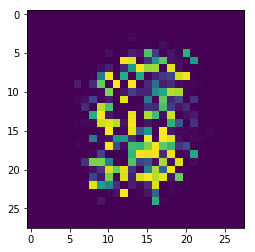

[Epoch 6/20] [Batch 0/937] [D loss: 0.712765] [G loss: 0.671266]
[Epoch 6/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.691518]
[Epoch 6/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.685147]
[Epoch 6/20] [Batch 3/937] [D loss: 0.715155] [G loss: 0.680292]
[Epoch 6/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.684584]
[Epoch 6/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.677145]
[Epoch 6/20] [Batch 6/937] [D loss: 0.716437] [G loss: 0.670854]
[Epoch 6/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.673067]
[Epoch 6/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.663719]
[Epoch 6/20] [Batch 9/937] [D loss: 0.720717] [G loss: 0.659177]
[Epoch 6/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.657817]
[Epoch 6/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.652977]
[Epoch 6/20] [Batch 12/937] [D loss: 0.720034] [G loss: 0.643575]
[Epoch 6/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.652406]
[Epoch 6/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.645374]
[Epoch 6/2

[Epoch 6/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.667812]
[Epoch 6/20] [Batch 123/937] [D loss: 0.731743] [G loss: 0.669727]
[Epoch 6/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.673304]
[Epoch 6/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.667053]
[Epoch 6/20] [Batch 126/937] [D loss: 0.739002] [G loss: 0.662477]
[Epoch 6/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.662634]
[Epoch 6/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.659980]
[Epoch 6/20] [Batch 129/937] [D loss: 0.739622] [G loss: 0.656609]
[Epoch 6/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.663871]
[Epoch 6/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.663450]
[Epoch 6/20] [Batch 132/937] [D loss: 0.735328] [G loss: 0.662516]
[Epoch 6/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.659240]
[Epoch 6/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.655397]
[Epoch 6/20] [Batch 135/937] [D loss: 0.727705] [G loss: 0.659440]
[Epoch 6/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 6/20] [Batch 243/937] [D loss: 0.664364] [G loss: 0.748335]
[Epoch 6/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.747726]
[Epoch 6/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.745108]
[Epoch 6/20] [Batch 246/937] [D loss: 0.663031] [G loss: 0.743726]
[Epoch 6/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.737164]
[Epoch 6/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.728747]
[Epoch 6/20] [Batch 249/937] [D loss: 0.662928] [G loss: 0.723935]
[Epoch 6/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.740680]
[Epoch 6/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.730489]
[Epoch 6/20] [Batch 252/937] [D loss: 0.667965] [G loss: 0.728215]
[Epoch 6/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.738623]
[Epoch 6/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.740062]
[Epoch 6/20] [Batch 255/937] [D loss: 0.671380] [G loss: 0.729063]
[Epoch 6/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.745304]
[Epoch 6/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 6/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.656555]
[Epoch 6/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.650622]
[Epoch 6/20] [Batch 366/937] [D loss: 0.733962] [G loss: 0.646127]
[Epoch 6/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.677234]
[Epoch 6/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.669256]
[Epoch 6/20] [Batch 369/937] [D loss: 0.731418] [G loss: 0.662997]
[Epoch 6/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.683532]
[Epoch 6/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.687909]
[Epoch 6/20] [Batch 372/937] [D loss: 0.728174] [G loss: 0.672588]
[Epoch 6/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.676435]
[Epoch 6/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.670588]
[Epoch 6/20] [Batch 375/937] [D loss: 0.724293] [G loss: 0.662682]
[Epoch 6/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.661329]
[Epoch 6/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.661323]
[Epoch 6/20] [Batch 378/937] [D loss: 0.724540] [G l

[Epoch 6/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.645943]
[Epoch 6/20] [Batch 486/937] [D loss: 0.729855] [G loss: 0.639075]
[Epoch 6/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.661143]
[Epoch 6/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.652414]
[Epoch 6/20] [Batch 489/937] [D loss: 0.725009] [G loss: 0.648612]
[Epoch 6/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.666386]
[Epoch 6/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.663409]
[Epoch 6/20] [Batch 492/937] [D loss: 0.717932] [G loss: 0.652989]
[Epoch 6/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.677957]
[Epoch 6/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.672268]
[Epoch 6/20] [Batch 495/937] [D loss: 0.713619] [G loss: 0.663970]
[Epoch 6/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.670452]
[Epoch 6/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.666366]
[Epoch 6/20] [Batch 498/937] [D loss: 0.709122] [G loss: 0.657121]
[Epoch 6/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 6/20] [Batch 606/937] [D loss: 0.694080] [G loss: 0.690129]
[Epoch 6/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.727828]
[Epoch 6/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.721723]
[Epoch 6/20] [Batch 609/937] [D loss: 0.698504] [G loss: 0.703599]
[Epoch 6/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.698166]
[Epoch 6/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.686623]
[Epoch 6/20] [Batch 612/937] [D loss: 0.706148] [G loss: 0.672775]
[Epoch 6/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.671803]
[Epoch 6/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.677450]
[Epoch 6/20] [Batch 615/937] [D loss: 0.703534] [G loss: 0.655428]
[Epoch 6/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.662979]
[Epoch 6/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.655450]
[Epoch 6/20] [Batch 618/937] [D loss: 0.701647] [G loss: 0.658080]
[Epoch 6/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.654155]
[Epoch 6/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 6/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.687898]
[Epoch 6/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.684676]
[Epoch 6/20] [Batch 729/937] [D loss: 0.702322] [G loss: 0.684096]
[Epoch 6/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.680620]
[Epoch 6/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.680509]
[Epoch 6/20] [Batch 732/937] [D loss: 0.700968] [G loss: 0.674140]
[Epoch 6/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.688089]
[Epoch 6/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.682727]
[Epoch 6/20] [Batch 735/937] [D loss: 0.691941] [G loss: 0.677398]
[Epoch 6/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.701955]
[Epoch 6/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.696545]
[Epoch 6/20] [Batch 738/937] [D loss: 0.698841] [G loss: 0.689374]
[Epoch 6/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.712430]
[Epoch 6/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.707001]
[Epoch 6/20] [Batch 741/937] [D loss: 0.694854] [G l

[Epoch 6/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.639801]
[Epoch 6/20] [Batch 849/937] [D loss: 0.767825] [G loss: 0.625610]
[Epoch 6/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.624521]
[Epoch 6/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.619149]
[Epoch 6/20] [Batch 852/937] [D loss: 0.765810] [G loss: 0.613572]
[Epoch 6/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.625672]
[Epoch 6/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.606410]
[Epoch 6/20] [Batch 855/937] [D loss: 0.762661] [G loss: 0.605699]
[Epoch 6/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.628996]
[Epoch 6/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.632718]
[Epoch 6/20] [Batch 858/937] [D loss: 0.760356] [G loss: 0.612097]
[Epoch 6/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.631287]
[Epoch 6/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.635670]
[Epoch 6/20] [Batch 861/937] [D loss: 0.758911] [G loss: 0.626681]
[Epoch 6/20] [Batch 862/937] [D loss: -1.000000] [G l

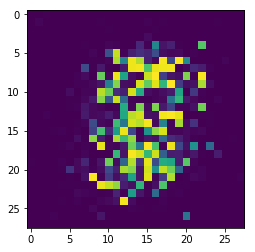

[Epoch 7/20] [Batch 0/937] [D loss: 0.697886] [G loss: 0.688941]
[Epoch 7/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.694375]
[Epoch 7/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.680274]
[Epoch 7/20] [Batch 3/937] [D loss: 0.707969] [G loss: 0.672092]
[Epoch 7/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.692894]
[Epoch 7/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.693482]
[Epoch 7/20] [Batch 6/937] [D loss: 0.708446] [G loss: 0.698999]
[Epoch 7/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.692223]
[Epoch 7/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.671615]
[Epoch 7/20] [Batch 9/937] [D loss: 0.721388] [G loss: 0.671237]
[Epoch 7/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.683970]
[Epoch 7/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.673271]
[Epoch 7/20] [Batch 12/937] [D loss: 0.731731] [G loss: 0.666934]
[Epoch 7/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.672092]
[Epoch 7/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.659025]
[Epoch 7/2

[Epoch 7/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.702411]
[Epoch 7/20] [Batch 123/937] [D loss: 0.670840] [G loss: 0.696259]
[Epoch 7/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.749407]
[Epoch 7/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.741670]
[Epoch 7/20] [Batch 126/937] [D loss: 0.673858] [G loss: 0.730071]
[Epoch 7/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.793449]
[Epoch 7/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.783465]
[Epoch 7/20] [Batch 129/937] [D loss: 0.673603] [G loss: 0.770905]
[Epoch 7/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.792373]
[Epoch 7/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.783557]
[Epoch 7/20] [Batch 132/937] [D loss: 0.673039] [G loss: 0.776785]
[Epoch 7/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.760882]
[Epoch 7/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.750389]
[Epoch 7/20] [Batch 135/937] [D loss: 0.679921] [G loss: 0.734668]
[Epoch 7/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 7/20] [Batch 243/937] [D loss: 0.694953] [G loss: 0.665605]
[Epoch 7/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.700311]
[Epoch 7/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.700805]
[Epoch 7/20] [Batch 246/937] [D loss: 0.681339] [G loss: 0.697559]
[Epoch 7/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.736858]
[Epoch 7/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.729530]
[Epoch 7/20] [Batch 249/937] [D loss: 0.686518] [G loss: 0.725272]
[Epoch 7/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.740767]
[Epoch 7/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.745764]
[Epoch 7/20] [Batch 252/937] [D loss: 0.676797] [G loss: 0.733591]
[Epoch 7/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.727362]
[Epoch 7/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.723857]
[Epoch 7/20] [Batch 255/937] [D loss: 0.677211] [G loss: 0.721974]
[Epoch 7/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.699945]
[Epoch 7/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 7/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.619505]
[Epoch 7/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.613766]
[Epoch 7/20] [Batch 366/937] [D loss: 0.768031] [G loss: 0.605617]
[Epoch 7/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.623298]
[Epoch 7/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.623429]
[Epoch 7/20] [Batch 369/937] [D loss: 0.767801] [G loss: 0.614042]
[Epoch 7/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.643913]
[Epoch 7/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.636241]
[Epoch 7/20] [Batch 372/937] [D loss: 0.756084] [G loss: 0.635880]
[Epoch 7/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.652666]
[Epoch 7/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.654904]
[Epoch 7/20] [Batch 375/937] [D loss: 0.755678] [G loss: 0.640489]
[Epoch 7/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.650130]
[Epoch 7/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.645162]
[Epoch 7/20] [Batch 378/937] [D loss: 0.746999] [G l

[Epoch 7/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.625853]
[Epoch 7/20] [Batch 486/937] [D loss: 0.799453] [G loss: 0.620269]
[Epoch 7/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.614545]
[Epoch 7/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.610384]
[Epoch 7/20] [Batch 489/937] [D loss: 0.805812] [G loss: 0.606037]
[Epoch 7/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.601764]
[Epoch 7/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.595463]
[Epoch 7/20] [Batch 492/937] [D loss: 0.810050] [G loss: 0.589122]
[Epoch 7/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.612495]
[Epoch 7/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.598230]
[Epoch 7/20] [Batch 495/937] [D loss: 0.809290] [G loss: 0.582105]
[Epoch 7/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.631953]
[Epoch 7/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.625299]
[Epoch 7/20] [Batch 498/937] [D loss: 0.793151] [G loss: 0.625535]
[Epoch 7/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 7/20] [Batch 606/937] [D loss: 0.650986] [G loss: 0.748217]
[Epoch 7/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.761388]
[Epoch 7/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.752667]
[Epoch 7/20] [Batch 609/937] [D loss: 0.656576] [G loss: 0.747523]
[Epoch 7/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.765535]
[Epoch 7/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.752980]
[Epoch 7/20] [Batch 612/937] [D loss: 0.666793] [G loss: 0.741188]
[Epoch 7/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.770123]
[Epoch 7/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.763703]
[Epoch 7/20] [Batch 615/937] [D loss: 0.671602] [G loss: 0.751786]
[Epoch 7/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.744524]
[Epoch 7/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.732165]
[Epoch 7/20] [Batch 618/937] [D loss: 0.683787] [G loss: 0.722128]
[Epoch 7/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.719930]
[Epoch 7/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 7/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.739439]
[Epoch 7/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.685278]
[Epoch 7/20] [Batch 729/937] [D loss: 0.686676] [G loss: 0.676401]
[Epoch 7/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.741705]
[Epoch 7/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.703452]
[Epoch 7/20] [Batch 732/937] [D loss: 0.683330] [G loss: 0.703019]
[Epoch 7/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.748146]
[Epoch 7/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.668957]
[Epoch 7/20] [Batch 735/937] [D loss: 0.682824] [G loss: 0.711766]
[Epoch 7/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.707864]
[Epoch 7/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.682040]
[Epoch 7/20] [Batch 738/937] [D loss: 0.687481] [G loss: 0.716062]
[Epoch 7/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.748274]
[Epoch 7/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.693724]
[Epoch 7/20] [Batch 741/937] [D loss: 0.720057] [G l

[Epoch 7/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.666779]
[Epoch 7/20] [Batch 849/937] [D loss: 0.738069] [G loss: 0.658601]
[Epoch 7/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.689429]
[Epoch 7/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.686711]
[Epoch 7/20] [Batch 852/937] [D loss: 0.745890] [G loss: 0.679113]
[Epoch 7/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.691481]
[Epoch 7/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.677218]
[Epoch 7/20] [Batch 855/937] [D loss: 0.736578] [G loss: 0.671325]
[Epoch 7/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.670153]
[Epoch 7/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.662256]
[Epoch 7/20] [Batch 858/937] [D loss: 0.740245] [G loss: 0.651668]
[Epoch 7/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.672187]
[Epoch 7/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.661863]
[Epoch 7/20] [Batch 861/937] [D loss: 0.745421] [G loss: 0.650672]
[Epoch 7/20] [Batch 862/937] [D loss: -1.000000] [G l

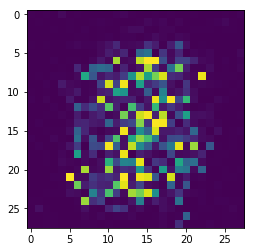

[Epoch 8/20] [Batch 0/937] [D loss: 0.716482] [G loss: 0.679009]
[Epoch 8/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.674431]
[Epoch 8/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.670668]
[Epoch 8/20] [Batch 3/937] [D loss: 0.715914] [G loss: 0.659273]
[Epoch 8/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.662608]
[Epoch 8/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.656650]
[Epoch 8/20] [Batch 6/937] [D loss: 0.712311] [G loss: 0.646480]
[Epoch 8/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.675734]
[Epoch 8/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.672387]
[Epoch 8/20] [Batch 9/937] [D loss: 0.711783] [G loss: 0.664063]
[Epoch 8/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.711208]
[Epoch 8/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.702523]
[Epoch 8/20] [Batch 12/937] [D loss: 0.713781] [G loss: 0.691317]
[Epoch 8/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.710028]
[Epoch 8/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.698723]
[Epoch 8/2

[Epoch 8/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.680947]
[Epoch 8/20] [Batch 123/937] [D loss: 0.716055] [G loss: 0.666999]
[Epoch 8/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.672052]
[Epoch 8/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.673206]
[Epoch 8/20] [Batch 126/937] [D loss: 0.717423] [G loss: 0.660859]
[Epoch 8/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.672192]
[Epoch 8/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.665402]
[Epoch 8/20] [Batch 129/937] [D loss: 0.712286] [G loss: 0.661903]
[Epoch 8/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.672688]
[Epoch 8/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.659152]
[Epoch 8/20] [Batch 132/937] [D loss: 0.725263] [G loss: 0.647382]
[Epoch 8/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.681103]
[Epoch 8/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.672619]
[Epoch 8/20] [Batch 135/937] [D loss: 0.724198] [G loss: 0.662525]
[Epoch 8/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 8/20] [Batch 243/937] [D loss: 0.718989] [G loss: 0.664126]
[Epoch 8/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.676071]
[Epoch 8/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.677839]
[Epoch 8/20] [Batch 246/937] [D loss: 0.729943] [G loss: 0.666218]
[Epoch 8/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.679275]
[Epoch 8/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.671718]
[Epoch 8/20] [Batch 249/937] [D loss: 0.735107] [G loss: 0.671934]
[Epoch 8/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.681911]
[Epoch 8/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.656252]
[Epoch 8/20] [Batch 252/937] [D loss: 0.739446] [G loss: 0.657223]
[Epoch 8/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.665456]
[Epoch 8/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.645040]
[Epoch 8/20] [Batch 255/937] [D loss: 0.747419] [G loss: 0.644045]
[Epoch 8/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.637496]
[Epoch 8/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 8/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.692017]
[Epoch 8/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.681002]
[Epoch 8/20] [Batch 366/937] [D loss: 0.717324] [G loss: 0.680176]
[Epoch 8/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.668003]
[Epoch 8/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.658827]
[Epoch 8/20] [Batch 369/937] [D loss: 0.724089] [G loss: 0.659889]
[Epoch 8/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.657696]
[Epoch 8/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.655299]
[Epoch 8/20] [Batch 372/937] [D loss: 0.727428] [G loss: 0.636967]
[Epoch 8/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.656497]
[Epoch 8/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.650588]
[Epoch 8/20] [Batch 375/937] [D loss: 0.726931] [G loss: 0.652219]
[Epoch 8/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.683612]
[Epoch 8/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.674844]
[Epoch 8/20] [Batch 378/937] [D loss: 0.735894] [G l

[Epoch 8/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.643248]
[Epoch 8/20] [Batch 486/937] [D loss: 0.753475] [G loss: 0.638556]
[Epoch 8/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.651413]
[Epoch 8/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.646388]
[Epoch 8/20] [Batch 489/937] [D loss: 0.754139] [G loss: 0.635625]
[Epoch 8/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.651006]
[Epoch 8/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.648514]
[Epoch 8/20] [Batch 492/937] [D loss: 0.751975] [G loss: 0.642133]
[Epoch 8/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.656180]
[Epoch 8/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.651907]
[Epoch 8/20] [Batch 495/937] [D loss: 0.756103] [G loss: 0.642821]
[Epoch 8/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.666939]
[Epoch 8/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.663375]
[Epoch 8/20] [Batch 498/937] [D loss: 0.753826] [G loss: 0.654507]
[Epoch 8/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 8/20] [Batch 606/937] [D loss: 0.731118] [G loss: 0.649703]
[Epoch 8/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.654143]
[Epoch 8/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.649152]
[Epoch 8/20] [Batch 609/937] [D loss: 0.737970] [G loss: 0.637589]
[Epoch 8/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.658850]
[Epoch 8/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.658962]
[Epoch 8/20] [Batch 612/937] [D loss: 0.733053] [G loss: 0.645832]
[Epoch 8/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.669196]
[Epoch 8/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.662297]
[Epoch 8/20] [Batch 615/937] [D loss: 0.736130] [G loss: 0.655369]
[Epoch 8/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.657844]
[Epoch 8/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.644456]
[Epoch 8/20] [Batch 618/937] [D loss: 0.740212] [G loss: 0.636779]
[Epoch 8/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.646005]
[Epoch 8/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 8/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.680096]
[Epoch 8/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.674487]
[Epoch 8/20] [Batch 729/937] [D loss: 0.724738] [G loss: 0.667160]
[Epoch 8/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.689195]
[Epoch 8/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.688836]
[Epoch 8/20] [Batch 732/937] [D loss: 0.717092] [G loss: 0.696786]
[Epoch 8/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.706197]
[Epoch 8/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.698091]
[Epoch 8/20] [Batch 735/937] [D loss: 0.721854] [G loss: 0.700381]
[Epoch 8/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.706206]
[Epoch 8/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.698686]
[Epoch 8/20] [Batch 738/937] [D loss: 0.721603] [G loss: 0.697258]
[Epoch 8/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.687223]
[Epoch 8/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.682243]
[Epoch 8/20] [Batch 741/937] [D loss: 0.721929] [G l

[Epoch 8/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.694032]
[Epoch 8/20] [Batch 849/937] [D loss: 0.710269] [G loss: 0.691046]
[Epoch 8/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.696590]
[Epoch 8/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.692782]
[Epoch 8/20] [Batch 852/937] [D loss: 0.707196] [G loss: 0.691215]
[Epoch 8/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.689177]
[Epoch 8/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.686378]
[Epoch 8/20] [Batch 855/937] [D loss: 0.710924] [G loss: 0.684752]
[Epoch 8/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.692426]
[Epoch 8/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.690041]
[Epoch 8/20] [Batch 858/937] [D loss: 0.713022] [G loss: 0.688039]
[Epoch 8/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.702808]
[Epoch 8/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.701695]
[Epoch 8/20] [Batch 861/937] [D loss: 0.714030] [G loss: 0.699608]
[Epoch 8/20] [Batch 862/937] [D loss: -1.000000] [G l

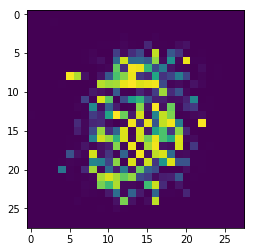

[Epoch 9/20] [Batch 0/937] [D loss: 0.697573] [G loss: 0.729849]
[Epoch 9/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.746488]
[Epoch 9/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.745652]
[Epoch 9/20] [Batch 3/937] [D loss: 0.695732] [G loss: 0.743958]
[Epoch 9/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.748104]
[Epoch 9/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.745891]
[Epoch 9/20] [Batch 6/937] [D loss: 0.699444] [G loss: 0.741724]
[Epoch 9/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.714475]
[Epoch 9/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.718003]
[Epoch 9/20] [Batch 9/937] [D loss: 0.698512] [G loss: 0.713342]
[Epoch 9/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.708086]
[Epoch 9/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.700316]
[Epoch 9/20] [Batch 12/937] [D loss: 0.700160] [G loss: 0.697735]
[Epoch 9/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.714790]
[Epoch 9/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.717665]
[Epoch 9/2

[Epoch 9/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.676869]
[Epoch 9/20] [Batch 123/937] [D loss: 0.693859] [G loss: 0.671710]
[Epoch 9/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.679483]
[Epoch 9/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.678730]
[Epoch 9/20] [Batch 126/937] [D loss: 0.696735] [G loss: 0.672359]
[Epoch 9/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.692018]
[Epoch 9/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.688219]
[Epoch 9/20] [Batch 129/937] [D loss: 0.700965] [G loss: 0.682647]
[Epoch 9/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.693462]
[Epoch 9/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.688940]
[Epoch 9/20] [Batch 132/937] [D loss: 0.703479] [G loss: 0.684364]
[Epoch 9/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.675416]
[Epoch 9/20] [Batch 134/937] [D loss: -1.000000] [G loss: 0.673840]
[Epoch 9/20] [Batch 135/937] [D loss: 0.702666] [G loss: 0.671425]
[Epoch 9/20] [Batch 136/937] [D loss: -1.000000] [G l

[Epoch 9/20] [Batch 243/937] [D loss: 0.709755] [G loss: 0.693843]
[Epoch 9/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.720845]
[Epoch 9/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.718201]
[Epoch 9/20] [Batch 246/937] [D loss: 0.711263] [G loss: 0.713154]
[Epoch 9/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.726299]
[Epoch 9/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.727060]
[Epoch 9/20] [Batch 249/937] [D loss: 0.713632] [G loss: 0.714814]
[Epoch 9/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.701925]
[Epoch 9/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.697256]
[Epoch 9/20] [Batch 252/937] [D loss: 0.714866] [G loss: 0.691892]
[Epoch 9/20] [Batch 253/937] [D loss: -1.000000] [G loss: 0.682084]
[Epoch 9/20] [Batch 254/937] [D loss: -1.000000] [G loss: 0.675789]
[Epoch 9/20] [Batch 255/937] [D loss: 0.717356] [G loss: 0.671807]
[Epoch 9/20] [Batch 256/937] [D loss: -1.000000] [G loss: 0.685433]
[Epoch 9/20] [Batch 257/937] [D loss: -1.000000] [G l

[Epoch 9/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.736366]
[Epoch 9/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.726428]
[Epoch 9/20] [Batch 366/937] [D loss: 0.688889] [G loss: 0.727460]
[Epoch 9/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.717330]
[Epoch 9/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.716685]
[Epoch 9/20] [Batch 369/937] [D loss: 0.687450] [G loss: 0.712463]
[Epoch 9/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.710368]
[Epoch 9/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.704859]
[Epoch 9/20] [Batch 372/937] [D loss: 0.691803] [G loss: 0.698151]
[Epoch 9/20] [Batch 373/937] [D loss: -1.000000] [G loss: 0.707580]
[Epoch 9/20] [Batch 374/937] [D loss: -1.000000] [G loss: 0.701120]
[Epoch 9/20] [Batch 375/937] [D loss: 0.691325] [G loss: 0.699907]
[Epoch 9/20] [Batch 376/937] [D loss: -1.000000] [G loss: 0.713319]
[Epoch 9/20] [Batch 377/937] [D loss: -1.000000] [G loss: 0.707623]
[Epoch 9/20] [Batch 378/937] [D loss: 0.695601] [G l

[Epoch 9/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.629490]
[Epoch 9/20] [Batch 486/937] [D loss: 0.722876] [G loss: 0.627603]
[Epoch 9/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.611393]
[Epoch 9/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.607028]
[Epoch 9/20] [Batch 489/937] [D loss: 0.723832] [G loss: 0.604467]
[Epoch 9/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.610307]
[Epoch 9/20] [Batch 491/937] [D loss: -1.000000] [G loss: 0.609560]
[Epoch 9/20] [Batch 492/937] [D loss: 0.722776] [G loss: 0.604407]
[Epoch 9/20] [Batch 493/937] [D loss: -1.000000] [G loss: 0.627145]
[Epoch 9/20] [Batch 494/937] [D loss: -1.000000] [G loss: 0.623415]
[Epoch 9/20] [Batch 495/937] [D loss: 0.720351] [G loss: 0.619858]
[Epoch 9/20] [Batch 496/937] [D loss: -1.000000] [G loss: 0.645864]
[Epoch 9/20] [Batch 497/937] [D loss: -1.000000] [G loss: 0.642558]
[Epoch 9/20] [Batch 498/937] [D loss: 0.721459] [G loss: 0.639874]
[Epoch 9/20] [Batch 499/937] [D loss: -1.000000] [G l

[Epoch 9/20] [Batch 606/937] [D loss: 0.704183] [G loss: 0.734167]
[Epoch 9/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.748861]
[Epoch 9/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.747307]
[Epoch 9/20] [Batch 609/937] [D loss: 0.704195] [G loss: 0.743893]
[Epoch 9/20] [Batch 610/937] [D loss: -1.000000] [G loss: 0.735796]
[Epoch 9/20] [Batch 611/937] [D loss: -1.000000] [G loss: 0.733213]
[Epoch 9/20] [Batch 612/937] [D loss: 0.705260] [G loss: 0.728418]
[Epoch 9/20] [Batch 613/937] [D loss: -1.000000] [G loss: 0.706409]
[Epoch 9/20] [Batch 614/937] [D loss: -1.000000] [G loss: 0.705575]
[Epoch 9/20] [Batch 615/937] [D loss: 0.703478] [G loss: 0.704317]
[Epoch 9/20] [Batch 616/937] [D loss: -1.000000] [G loss: 0.707367]
[Epoch 9/20] [Batch 617/937] [D loss: -1.000000] [G loss: 0.705845]
[Epoch 9/20] [Batch 618/937] [D loss: 0.699600] [G loss: 0.707437]
[Epoch 9/20] [Batch 619/937] [D loss: -1.000000] [G loss: 0.731293]
[Epoch 9/20] [Batch 620/937] [D loss: -1.000000] [G l

[Epoch 9/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.677846]
[Epoch 9/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.674178]
[Epoch 9/20] [Batch 729/937] [D loss: 0.712980] [G loss: 0.673845]
[Epoch 9/20] [Batch 730/937] [D loss: -1.000000] [G loss: 0.697298]
[Epoch 9/20] [Batch 731/937] [D loss: -1.000000] [G loss: 0.692117]
[Epoch 9/20] [Batch 732/937] [D loss: 0.709630] [G loss: 0.693429]
[Epoch 9/20] [Batch 733/937] [D loss: -1.000000] [G loss: 0.687446]
[Epoch 9/20] [Batch 734/937] [D loss: -1.000000] [G loss: 0.686229]
[Epoch 9/20] [Batch 735/937] [D loss: 0.707623] [G loss: 0.684807]
[Epoch 9/20] [Batch 736/937] [D loss: -1.000000] [G loss: 0.672310]
[Epoch 9/20] [Batch 737/937] [D loss: -1.000000] [G loss: 0.664630]
[Epoch 9/20] [Batch 738/937] [D loss: 0.709279] [G loss: 0.661729]
[Epoch 9/20] [Batch 739/937] [D loss: -1.000000] [G loss: 0.667683]
[Epoch 9/20] [Batch 740/937] [D loss: -1.000000] [G loss: 0.662704]
[Epoch 9/20] [Batch 741/937] [D loss: 0.708438] [G l

[Epoch 9/20] [Batch 848/937] [D loss: -1.000000] [G loss: 0.751252]
[Epoch 9/20] [Batch 849/937] [D loss: 0.689362] [G loss: 0.746868]
[Epoch 9/20] [Batch 850/937] [D loss: -1.000000] [G loss: 0.761633]
[Epoch 9/20] [Batch 851/937] [D loss: -1.000000] [G loss: 0.757774]
[Epoch 9/20] [Batch 852/937] [D loss: 0.689852] [G loss: 0.757652]
[Epoch 9/20] [Batch 853/937] [D loss: -1.000000] [G loss: 0.722303]
[Epoch 9/20] [Batch 854/937] [D loss: -1.000000] [G loss: 0.720740]
[Epoch 9/20] [Batch 855/937] [D loss: 0.691264] [G loss: 0.718488]
[Epoch 9/20] [Batch 856/937] [D loss: -1.000000] [G loss: 0.683397]
[Epoch 9/20] [Batch 857/937] [D loss: -1.000000] [G loss: 0.679393]
[Epoch 9/20] [Batch 858/937] [D loss: 0.690670] [G loss: 0.680298]
[Epoch 9/20] [Batch 859/937] [D loss: -1.000000] [G loss: 0.710998]
[Epoch 9/20] [Batch 860/937] [D loss: -1.000000] [G loss: 0.711324]
[Epoch 9/20] [Batch 861/937] [D loss: 0.690302] [G loss: 0.705396]
[Epoch 9/20] [Batch 862/937] [D loss: -1.000000] [G l

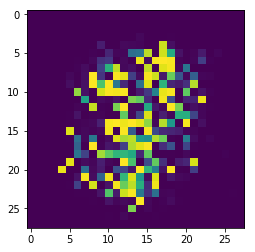

[Epoch 10/20] [Batch 0/937] [D loss: 0.721923] [G loss: 0.704166]
[Epoch 10/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.667339]
[Epoch 10/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.664280]
[Epoch 10/20] [Batch 3/937] [D loss: 0.718396] [G loss: 0.670915]
[Epoch 10/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.646999]
[Epoch 10/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.644337]
[Epoch 10/20] [Batch 6/937] [D loss: 0.722919] [G loss: 0.641451]
[Epoch 10/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.665811]
[Epoch 10/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.659904]
[Epoch 10/20] [Batch 9/937] [D loss: 0.721144] [G loss: 0.656390]
[Epoch 10/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.688394]
[Epoch 10/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.685871]
[Epoch 10/20] [Batch 12/937] [D loss: 0.719392] [G loss: 0.687024]
[Epoch 10/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.687098]
[Epoch 10/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.684

[Epoch 10/20] [Batch 120/937] [D loss: 0.705795] [G loss: 0.708084]
[Epoch 10/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.716239]
[Epoch 10/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.715285]
[Epoch 10/20] [Batch 123/937] [D loss: 0.703244] [G loss: 0.713425]
[Epoch 10/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.711285]
[Epoch 10/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.710786]
[Epoch 10/20] [Batch 126/937] [D loss: 0.700809] [G loss: 0.710168]
[Epoch 10/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.697125]
[Epoch 10/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.695991]
[Epoch 10/20] [Batch 129/937] [D loss: 0.699438] [G loss: 0.695217]
[Epoch 10/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.705392]
[Epoch 10/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.703624]
[Epoch 10/20] [Batch 132/937] [D loss: 0.697373] [G loss: 0.702751]
[Epoch 10/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.727832]
[Epoch 10/20] [Batch 134/937] [D loss: 

[Epoch 10/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.635324]
[Epoch 10/20] [Batch 240/937] [D loss: 0.719500] [G loss: 0.634944]
[Epoch 10/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.616238]
[Epoch 10/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.613492]
[Epoch 10/20] [Batch 243/937] [D loss: 0.716157] [G loss: 0.612686]
[Epoch 10/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.615167]
[Epoch 10/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.613415]
[Epoch 10/20] [Batch 246/937] [D loss: 0.710804] [G loss: 0.612424]
[Epoch 10/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.643075]
[Epoch 10/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.638908]
[Epoch 10/20] [Batch 249/937] [D loss: 0.707625] [G loss: 0.640083]
[Epoch 10/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.676937]
[Epoch 10/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.676649]
[Epoch 10/20] [Batch 252/937] [D loss: 0.703254] [G loss: 0.672767]
[Epoch 10/20] [Batch 253/937] [D loss: 

[Epoch 10/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.748323]
[Epoch 10/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.731499]
[Epoch 10/20] [Batch 360/937] [D loss: 0.722271] [G loss: 0.726094]
[Epoch 10/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.713398]
[Epoch 10/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.701910]
[Epoch 10/20] [Batch 363/937] [D loss: 0.724920] [G loss: 0.695994]
[Epoch 10/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.677978]
[Epoch 10/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.672671]
[Epoch 10/20] [Batch 366/937] [D loss: 0.728313] [G loss: 0.666154]
[Epoch 10/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.676880]
[Epoch 10/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.668173]
[Epoch 10/20] [Batch 369/937] [D loss: 0.723801] [G loss: 0.673356]
[Epoch 10/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.714209]
[Epoch 10/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.711522]
[Epoch 10/20] [Batch 372/937] [D loss:

[Epoch 10/20] [Batch 477/937] [D loss: 0.695645] [G loss: 0.674442]
[Epoch 10/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.674806]
[Epoch 10/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.671183]
[Epoch 10/20] [Batch 480/937] [D loss: 0.697185] [G loss: 0.667984]
[Epoch 10/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.685537]
[Epoch 10/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.681413]
[Epoch 10/20] [Batch 483/937] [D loss: 0.701156] [G loss: 0.676560]
[Epoch 10/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.705072]
[Epoch 10/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.705404]
[Epoch 10/20] [Batch 486/937] [D loss: 0.704458] [G loss: 0.697877]
[Epoch 10/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.701331]
[Epoch 10/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.697109]
[Epoch 10/20] [Batch 489/937] [D loss: 0.707188] [G loss: 0.692843]
[Epoch 10/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.673124]
[Epoch 10/20] [Batch 491/937] [D loss: 

[Epoch 10/20] [Batch 596/937] [D loss: -1.000000] [G loss: 0.640019]
[Epoch 10/20] [Batch 597/937] [D loss: 0.706916] [G loss: 0.639496]
[Epoch 10/20] [Batch 598/937] [D loss: -1.000000] [G loss: 0.660508]
[Epoch 10/20] [Batch 599/937] [D loss: -1.000000] [G loss: 0.653958]
[Epoch 10/20] [Batch 600/937] [D loss: 0.709757] [G loss: 0.651421]
[Epoch 10/20] [Batch 601/937] [D loss: -1.000000] [G loss: 0.677117]
[Epoch 10/20] [Batch 602/937] [D loss: -1.000000] [G loss: 0.672588]
[Epoch 10/20] [Batch 603/937] [D loss: 0.710299] [G loss: 0.667010]
[Epoch 10/20] [Batch 604/937] [D loss: -1.000000] [G loss: 0.683301]
[Epoch 10/20] [Batch 605/937] [D loss: -1.000000] [G loss: 0.679095]
[Epoch 10/20] [Batch 606/937] [D loss: 0.711002] [G loss: 0.674049]
[Epoch 10/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.668830]
[Epoch 10/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.666691]
[Epoch 10/20] [Batch 609/937] [D loss: 0.712032] [G loss: 0.662884]
[Epoch 10/20] [Batch 610/937] [D loss: 

[Epoch 10/20] [Batch 715/937] [D loss: -1.000000] [G loss: 0.667176]
[Epoch 10/20] [Batch 716/937] [D loss: -1.000000] [G loss: 0.669764]
[Epoch 10/20] [Batch 717/937] [D loss: 0.735343] [G loss: 0.668954]
[Epoch 10/20] [Batch 718/937] [D loss: -1.000000] [G loss: 0.677881]
[Epoch 10/20] [Batch 719/937] [D loss: -1.000000] [G loss: 0.676989]
[Epoch 10/20] [Batch 720/937] [D loss: 0.729324] [G loss: 0.678333]
[Epoch 10/20] [Batch 721/937] [D loss: -1.000000] [G loss: 0.687948]
[Epoch 10/20] [Batch 722/937] [D loss: -1.000000] [G loss: 0.685883]
[Epoch 10/20] [Batch 723/937] [D loss: 0.725013] [G loss: 0.686248]
[Epoch 10/20] [Batch 724/937] [D loss: -1.000000] [G loss: 0.684814]
[Epoch 10/20] [Batch 725/937] [D loss: -1.000000] [G loss: 0.680641]
[Epoch 10/20] [Batch 726/937] [D loss: 0.719060] [G loss: 0.684336]
[Epoch 10/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.683232]
[Epoch 10/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.681897]
[Epoch 10/20] [Batch 729/937] [D loss:

[Epoch 10/20] [Batch 834/937] [D loss: 0.739358] [G loss: 0.610946]
[Epoch 10/20] [Batch 835/937] [D loss: -1.000000] [G loss: 0.667278]
[Epoch 10/20] [Batch 836/937] [D loss: -1.000000] [G loss: 0.661413]
[Epoch 10/20] [Batch 837/937] [D loss: 0.735960] [G loss: 0.657392]
[Epoch 10/20] [Batch 838/937] [D loss: -1.000000] [G loss: 0.686000]
[Epoch 10/20] [Batch 839/937] [D loss: -1.000000] [G loss: 0.675399]
[Epoch 10/20] [Batch 840/937] [D loss: 0.735668] [G loss: 0.666848]
[Epoch 10/20] [Batch 841/937] [D loss: -1.000000] [G loss: 0.665720]
[Epoch 10/20] [Batch 842/937] [D loss: -1.000000] [G loss: 0.657644]
[Epoch 10/20] [Batch 843/937] [D loss: 0.733950] [G loss: 0.650766]
[Epoch 10/20] [Batch 844/937] [D loss: -1.000000] [G loss: 0.636626]
[Epoch 10/20] [Batch 845/937] [D loss: -1.000000] [G loss: 0.631138]
[Epoch 10/20] [Batch 846/937] [D loss: 0.728104] [G loss: 0.628034]
[Epoch 10/20] [Batch 847/937] [D loss: -1.000000] [G loss: 0.635516]
[Epoch 10/20] [Batch 848/937] [D loss: 

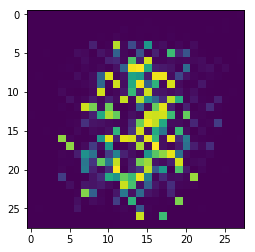

[Epoch 11/20] [Batch 0/937] [D loss: 0.711397] [G loss: 0.674117]
[Epoch 11/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.675525]
[Epoch 11/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.676157]
[Epoch 11/20] [Batch 3/937] [D loss: 0.709681] [G loss: 0.670138]
[Epoch 11/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.672036]
[Epoch 11/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.671589]
[Epoch 11/20] [Batch 6/937] [D loss: 0.706917] [G loss: 0.669634]
[Epoch 11/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.676712]
[Epoch 11/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.678079]
[Epoch 11/20] [Batch 9/937] [D loss: 0.705574] [G loss: 0.671875]
[Epoch 11/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.687508]
[Epoch 11/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.682569]
[Epoch 11/20] [Batch 12/937] [D loss: 0.703270] [G loss: 0.683129]
[Epoch 11/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.698650]
[Epoch 11/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.696

[Epoch 11/20] [Batch 120/937] [D loss: 0.717090] [G loss: 0.667475]
[Epoch 11/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.664353]
[Epoch 11/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.661213]
[Epoch 11/20] [Batch 123/937] [D loss: 0.714050] [G loss: 0.651379]
[Epoch 11/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.669240]
[Epoch 11/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.661339]
[Epoch 11/20] [Batch 126/937] [D loss: 0.711413] [G loss: 0.659629]
[Epoch 11/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.677436]
[Epoch 11/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.668755]
[Epoch 11/20] [Batch 129/937] [D loss: 0.712796] [G loss: 0.660988]
[Epoch 11/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.693398]
[Epoch 11/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.680964]
[Epoch 11/20] [Batch 132/937] [D loss: 0.715229] [G loss: 0.671640]
[Epoch 11/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.698301]
[Epoch 11/20] [Batch 134/937] [D loss: 

[Epoch 11/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.684272]
[Epoch 11/20] [Batch 240/937] [D loss: 0.714792] [G loss: 0.679103]
[Epoch 11/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.682392]
[Epoch 11/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.680488]
[Epoch 11/20] [Batch 243/937] [D loss: 0.713163] [G loss: 0.678284]
[Epoch 11/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.685080]
[Epoch 11/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.683994]
[Epoch 11/20] [Batch 246/937] [D loss: 0.714131] [G loss: 0.683327]
[Epoch 11/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.687801]
[Epoch 11/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.676611]
[Epoch 11/20] [Batch 249/937] [D loss: 0.719208] [G loss: 0.678123]
[Epoch 11/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.668987]
[Epoch 11/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.664228]
[Epoch 11/20] [Batch 252/937] [D loss: 0.717627] [G loss: 0.666740]
[Epoch 11/20] [Batch 253/937] [D loss: 

[Epoch 11/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.611802]
[Epoch 11/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.612643]
[Epoch 11/20] [Batch 360/937] [D loss: 0.727237] [G loss: 0.605532]
[Epoch 11/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.625553]
[Epoch 11/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.617386]
[Epoch 11/20] [Batch 363/937] [D loss: 0.716268] [G loss: 0.618109]
[Epoch 11/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.656109]
[Epoch 11/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.651479]
[Epoch 11/20] [Batch 366/937] [D loss: 0.710681] [G loss: 0.643296]
[Epoch 11/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.678031]
[Epoch 11/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.674346]
[Epoch 11/20] [Batch 369/937] [D loss: 0.707864] [G loss: 0.668453]
[Epoch 11/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.682786]
[Epoch 11/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.678857]
[Epoch 11/20] [Batch 372/937] [D loss:

[Epoch 11/20] [Batch 477/937] [D loss: 0.750436] [G loss: 0.605576]
[Epoch 11/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.639885]
[Epoch 11/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.630575]
[Epoch 11/20] [Batch 480/937] [D loss: 0.745255] [G loss: 0.630683]
[Epoch 11/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.651114]
[Epoch 11/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.641078]
[Epoch 11/20] [Batch 483/937] [D loss: 0.742735] [G loss: 0.641437]
[Epoch 11/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.643155]
[Epoch 11/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.638568]
[Epoch 11/20] [Batch 486/937] [D loss: 0.743620] [G loss: 0.631572]
[Epoch 11/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.617466]
[Epoch 11/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.615149]
[Epoch 11/20] [Batch 489/937] [D loss: 0.745258] [G loss: 0.609177]
[Epoch 11/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.591753]
[Epoch 11/20] [Batch 491/937] [D loss: 

[Epoch 11/20] [Batch 596/937] [D loss: -1.000000] [G loss: 0.671955]
[Epoch 11/20] [Batch 597/937] [D loss: 0.724985] [G loss: 0.667784]
[Epoch 11/20] [Batch 598/937] [D loss: -1.000000] [G loss: 0.663148]
[Epoch 11/20] [Batch 599/937] [D loss: -1.000000] [G loss: 0.662026]
[Epoch 11/20] [Batch 600/937] [D loss: 0.721585] [G loss: 0.663095]
[Epoch 11/20] [Batch 601/937] [D loss: -1.000000] [G loss: 0.668969]
[Epoch 11/20] [Batch 602/937] [D loss: -1.000000] [G loss: 0.667377]
[Epoch 11/20] [Batch 603/937] [D loss: 0.725966] [G loss: 0.659277]
[Epoch 11/20] [Batch 604/937] [D loss: -1.000000] [G loss: 0.676487]
[Epoch 11/20] [Batch 605/937] [D loss: -1.000000] [G loss: 0.672358]
[Epoch 11/20] [Batch 606/937] [D loss: 0.722601] [G loss: 0.677372]
[Epoch 11/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.690388]
[Epoch 11/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.684611]
[Epoch 11/20] [Batch 609/937] [D loss: 0.727462] [G loss: 0.685673]
[Epoch 11/20] [Batch 610/937] [D loss: 

[Epoch 11/20] [Batch 715/937] [D loss: -1.000000] [G loss: 0.755915]
[Epoch 11/20] [Batch 716/937] [D loss: -1.000000] [G loss: 0.752109]
[Epoch 11/20] [Batch 717/937] [D loss: 0.695164] [G loss: 0.748720]
[Epoch 11/20] [Batch 718/937] [D loss: -1.000000] [G loss: 0.763616]
[Epoch 11/20] [Batch 719/937] [D loss: -1.000000] [G loss: 0.761933]
[Epoch 11/20] [Batch 720/937] [D loss: 0.690701] [G loss: 0.753888]
[Epoch 11/20] [Batch 721/937] [D loss: -1.000000] [G loss: 0.744193]
[Epoch 11/20] [Batch 722/937] [D loss: -1.000000] [G loss: 0.736682]
[Epoch 11/20] [Batch 723/937] [D loss: 0.686098] [G loss: 0.733234]
[Epoch 11/20] [Batch 724/937] [D loss: -1.000000] [G loss: 0.745411]
[Epoch 11/20] [Batch 725/937] [D loss: -1.000000] [G loss: 0.744377]
[Epoch 11/20] [Batch 726/937] [D loss: 0.682517] [G loss: 0.737948]
[Epoch 11/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.766727]
[Epoch 11/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.763110]
[Epoch 11/20] [Batch 729/937] [D loss:

[Epoch 11/20] [Batch 834/937] [D loss: 0.729795] [G loss: 0.627090]
[Epoch 11/20] [Batch 835/937] [D loss: -1.000000] [G loss: 0.631074]
[Epoch 11/20] [Batch 836/937] [D loss: -1.000000] [G loss: 0.626474]
[Epoch 11/20] [Batch 837/937] [D loss: 0.717908] [G loss: 0.621289]
[Epoch 11/20] [Batch 838/937] [D loss: -1.000000] [G loss: 0.676875]
[Epoch 11/20] [Batch 839/937] [D loss: -1.000000] [G loss: 0.671215]
[Epoch 11/20] [Batch 840/937] [D loss: 0.707014] [G loss: 0.668464]
[Epoch 11/20] [Batch 841/937] [D loss: -1.000000] [G loss: 0.711582]
[Epoch 11/20] [Batch 842/937] [D loss: -1.000000] [G loss: 0.706361]
[Epoch 11/20] [Batch 843/937] [D loss: 0.699188] [G loss: 0.702290]
[Epoch 11/20] [Batch 844/937] [D loss: -1.000000] [G loss: 0.699724]
[Epoch 11/20] [Batch 845/937] [D loss: -1.000000] [G loss: 0.694186]
[Epoch 11/20] [Batch 846/937] [D loss: 0.690096] [G loss: 0.690640]
[Epoch 11/20] [Batch 847/937] [D loss: -1.000000] [G loss: 0.670250]
[Epoch 11/20] [Batch 848/937] [D loss: 

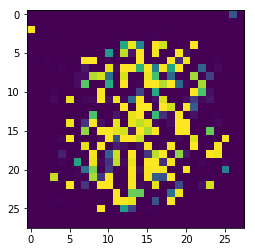

[Epoch 12/20] [Batch 0/937] [D loss: 0.689361] [G loss: 0.695437]
[Epoch 12/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.695907]
[Epoch 12/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.677121]
[Epoch 12/20] [Batch 3/937] [D loss: 0.685656] [G loss: 0.675259]
[Epoch 12/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.668109]
[Epoch 12/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.654402]
[Epoch 12/20] [Batch 6/937] [D loss: 0.697299] [G loss: 0.638385]
[Epoch 12/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.702905]
[Epoch 12/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.683828]
[Epoch 12/20] [Batch 9/937] [D loss: 0.689967] [G loss: 0.695851]
[Epoch 12/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.720477]
[Epoch 12/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.717972]
[Epoch 12/20] [Batch 12/937] [D loss: 0.706929] [G loss: 0.697902]
[Epoch 12/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.703342]
[Epoch 12/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.685

[Epoch 12/20] [Batch 120/937] [D loss: 0.682337] [G loss: 0.675924]
[Epoch 12/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.717084]
[Epoch 12/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.712689]
[Epoch 12/20] [Batch 123/937] [D loss: 0.680383] [G loss: 0.710021]
[Epoch 12/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.726414]
[Epoch 12/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.723656]
[Epoch 12/20] [Batch 126/937] [D loss: 0.675649] [G loss: 0.719339]
[Epoch 12/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.710349]
[Epoch 12/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.705385]
[Epoch 12/20] [Batch 129/937] [D loss: 0.674414] [G loss: 0.699275]
[Epoch 12/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.705135]
[Epoch 12/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.700583]
[Epoch 12/20] [Batch 132/937] [D loss: 0.672572] [G loss: 0.693947]
[Epoch 12/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.731607]
[Epoch 12/20] [Batch 134/937] [D loss: 

[Epoch 12/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.695541]
[Epoch 12/20] [Batch 240/937] [D loss: 0.681042] [G loss: 0.694802]
[Epoch 12/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.709801]
[Epoch 12/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.700350]
[Epoch 12/20] [Batch 243/937] [D loss: 0.680534] [G loss: 0.699597]
[Epoch 12/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.736753]
[Epoch 12/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.731288]
[Epoch 12/20] [Batch 246/937] [D loss: 0.680043] [G loss: 0.728227]
[Epoch 12/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.748028]
[Epoch 12/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.737579]
[Epoch 12/20] [Batch 249/937] [D loss: 0.681877] [G loss: 0.732058]
[Epoch 12/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.715610]
[Epoch 12/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.712204]
[Epoch 12/20] [Batch 252/937] [D loss: 0.684520] [G loss: 0.704111]
[Epoch 12/20] [Batch 253/937] [D loss: 

[Epoch 12/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.724748]
[Epoch 12/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.715371]
[Epoch 12/20] [Batch 360/937] [D loss: 0.682269] [G loss: 0.713621]
[Epoch 12/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.688319]
[Epoch 12/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.680605]
[Epoch 12/20] [Batch 363/937] [D loss: 0.683902] [G loss: 0.675048]
[Epoch 12/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.690547]
[Epoch 12/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.683142]
[Epoch 12/20] [Batch 366/937] [D loss: 0.682212] [G loss: 0.680480]
[Epoch 12/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.733551]
[Epoch 12/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.723538]
[Epoch 12/20] [Batch 369/937] [D loss: 0.680449] [G loss: 0.721430]
[Epoch 12/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.748388]
[Epoch 12/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.742218]
[Epoch 12/20] [Batch 372/937] [D loss:

[Epoch 12/20] [Batch 477/937] [D loss: 0.684929] [G loss: 0.715272]
[Epoch 12/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.687520]
[Epoch 12/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.682768]
[Epoch 12/20] [Batch 480/937] [D loss: 0.679071] [G loss: 0.679596]
[Epoch 12/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.712758]
[Epoch 12/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.703882]
[Epoch 12/20] [Batch 483/937] [D loss: 0.681236] [G loss: 0.704021]
[Epoch 12/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.757585]
[Epoch 12/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.752152]
[Epoch 12/20] [Batch 486/937] [D loss: 0.686139] [G loss: 0.748448]
[Epoch 12/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.734620]
[Epoch 12/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.726062]
[Epoch 12/20] [Batch 489/937] [D loss: 0.694248] [G loss: 0.716972]
[Epoch 12/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.659248]
[Epoch 12/20] [Batch 491/937] [D loss: 

[Epoch 12/20] [Batch 596/937] [D loss: -1.000000] [G loss: 0.687904]
[Epoch 12/20] [Batch 597/937] [D loss: 0.711763] [G loss: 0.682404]
[Epoch 12/20] [Batch 598/937] [D loss: -1.000000] [G loss: 0.689782]
[Epoch 12/20] [Batch 599/937] [D loss: -1.000000] [G loss: 0.687720]
[Epoch 12/20] [Batch 600/937] [D loss: 0.719585] [G loss: 0.682266]
[Epoch 12/20] [Batch 601/937] [D loss: -1.000000] [G loss: 0.692353]
[Epoch 12/20] [Batch 602/937] [D loss: -1.000000] [G loss: 0.686185]
[Epoch 12/20] [Batch 603/937] [D loss: 0.723000] [G loss: 0.684108]
[Epoch 12/20] [Batch 604/937] [D loss: -1.000000] [G loss: 0.685278]
[Epoch 12/20] [Batch 605/937] [D loss: -1.000000] [G loss: 0.675943]
[Epoch 12/20] [Batch 606/937] [D loss: 0.730016] [G loss: 0.675384]
[Epoch 12/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.670645]
[Epoch 12/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.666648]
[Epoch 12/20] [Batch 609/937] [D loss: 0.731575] [G loss: 0.659936]
[Epoch 12/20] [Batch 610/937] [D loss: 

[Epoch 12/20] [Batch 715/937] [D loss: -1.000000] [G loss: 0.682999]
[Epoch 12/20] [Batch 716/937] [D loss: -1.000000] [G loss: 0.681113]
[Epoch 12/20] [Batch 717/937] [D loss: 0.715980] [G loss: 0.677295]
[Epoch 12/20] [Batch 718/937] [D loss: -1.000000] [G loss: 0.685980]
[Epoch 12/20] [Batch 719/937] [D loss: -1.000000] [G loss: 0.682171]
[Epoch 12/20] [Batch 720/937] [D loss: 0.716422] [G loss: 0.679118]
[Epoch 12/20] [Batch 721/937] [D loss: -1.000000] [G loss: 0.681188]
[Epoch 12/20] [Batch 722/937] [D loss: -1.000000] [G loss: 0.679651]
[Epoch 12/20] [Batch 723/937] [D loss: 0.717822] [G loss: 0.674181]
[Epoch 12/20] [Batch 724/937] [D loss: -1.000000] [G loss: 0.674238]
[Epoch 12/20] [Batch 725/937] [D loss: -1.000000] [G loss: 0.668598]
[Epoch 12/20] [Batch 726/937] [D loss: 0.720550] [G loss: 0.666849]
[Epoch 12/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.689940]
[Epoch 12/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.689557]
[Epoch 12/20] [Batch 729/937] [D loss:

[Epoch 12/20] [Batch 834/937] [D loss: 0.707698] [G loss: 0.679102]
[Epoch 12/20] [Batch 835/937] [D loss: -1.000000] [G loss: 0.659470]
[Epoch 12/20] [Batch 836/937] [D loss: -1.000000] [G loss: 0.659153]
[Epoch 12/20] [Batch 837/937] [D loss: 0.704613] [G loss: 0.658694]
[Epoch 12/20] [Batch 838/937] [D loss: -1.000000] [G loss: 0.700236]
[Epoch 12/20] [Batch 839/937] [D loss: -1.000000] [G loss: 0.697896]
[Epoch 12/20] [Batch 840/937] [D loss: 0.703503] [G loss: 0.700898]
[Epoch 12/20] [Batch 841/937] [D loss: -1.000000] [G loss: 0.733743]
[Epoch 12/20] [Batch 842/937] [D loss: -1.000000] [G loss: 0.731354]
[Epoch 12/20] [Batch 843/937] [D loss: 0.700491] [G loss: 0.731446]
[Epoch 12/20] [Batch 844/937] [D loss: -1.000000] [G loss: 0.719188]
[Epoch 12/20] [Batch 845/937] [D loss: -1.000000] [G loss: 0.719519]
[Epoch 12/20] [Batch 846/937] [D loss: 0.700733] [G loss: 0.718476]
[Epoch 12/20] [Batch 847/937] [D loss: -1.000000] [G loss: 0.673295]
[Epoch 12/20] [Batch 848/937] [D loss: 

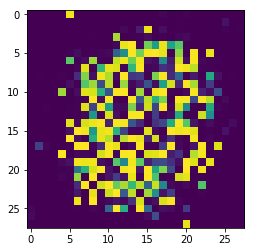

[Epoch 13/20] [Batch 0/937] [D loss: 0.701171] [G loss: 0.696244]
[Epoch 13/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.679652]
[Epoch 13/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.678033]
[Epoch 13/20] [Batch 3/937] [D loss: 0.698791] [G loss: 0.675307]
[Epoch 13/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.660455]
[Epoch 13/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.658272]
[Epoch 13/20] [Batch 6/937] [D loss: 0.697941] [G loss: 0.656996]
[Epoch 13/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.675415]
[Epoch 13/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.671810]
[Epoch 13/20] [Batch 9/937] [D loss: 0.696615] [G loss: 0.670945]
[Epoch 13/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.716105]
[Epoch 13/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.713815]
[Epoch 13/20] [Batch 12/937] [D loss: 0.695013] [G loss: 0.709935]
[Epoch 13/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.731020]
[Epoch 13/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.730

[Epoch 13/20] [Batch 120/937] [D loss: 0.704705] [G loss: 0.694197]
[Epoch 13/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.671714]
[Epoch 13/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.668648]
[Epoch 13/20] [Batch 123/937] [D loss: 0.702935] [G loss: 0.668402]
[Epoch 13/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.660188]
[Epoch 13/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.659050]
[Epoch 13/20] [Batch 126/937] [D loss: 0.701053] [G loss: 0.658683]
[Epoch 13/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.681438]
[Epoch 13/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.680937]
[Epoch 13/20] [Batch 129/937] [D loss: 0.701840] [G loss: 0.678850]
[Epoch 13/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.689211]
[Epoch 13/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.687927]
[Epoch 13/20] [Batch 132/937] [D loss: 0.699402] [G loss: 0.687368]
[Epoch 13/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.684765]
[Epoch 13/20] [Batch 134/937] [D loss: 

[Epoch 13/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.671673]
[Epoch 13/20] [Batch 240/937] [D loss: 0.719586] [G loss: 0.669074]
[Epoch 13/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.703956]
[Epoch 13/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.703871]
[Epoch 13/20] [Batch 243/937] [D loss: 0.716656] [G loss: 0.701817]
[Epoch 13/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.710701]
[Epoch 13/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.711706]
[Epoch 13/20] [Batch 246/937] [D loss: 0.713150] [G loss: 0.708039]
[Epoch 13/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.681077]
[Epoch 13/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.679966]
[Epoch 13/20] [Batch 249/937] [D loss: 0.709888] [G loss: 0.680838]
[Epoch 13/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.662267]
[Epoch 13/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.662473]
[Epoch 13/20] [Batch 252/937] [D loss: 0.709333] [G loss: 0.659897]
[Epoch 13/20] [Batch 253/937] [D loss: 

[Epoch 13/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.624070]
[Epoch 13/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.623285]
[Epoch 13/20] [Batch 360/937] [D loss: 0.710997] [G loss: 0.622200]
[Epoch 13/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.625730]
[Epoch 13/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.625194]
[Epoch 13/20] [Batch 363/937] [D loss: 0.707089] [G loss: 0.624645]
[Epoch 13/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.628759]
[Epoch 13/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.627787]
[Epoch 13/20] [Batch 366/937] [D loss: 0.702367] [G loss: 0.626699]
[Epoch 13/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.631872]
[Epoch 13/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.630510]
[Epoch 13/20] [Batch 369/937] [D loss: 0.699437] [G loss: 0.630250]
[Epoch 13/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.636454]
[Epoch 13/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.636153]
[Epoch 13/20] [Batch 372/937] [D loss:

[Epoch 13/20] [Batch 477/937] [D loss: 0.710909] [G loss: 0.710993]
[Epoch 13/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.723098]
[Epoch 13/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.719189]
[Epoch 13/20] [Batch 480/937] [D loss: 0.710902] [G loss: 0.717651]
[Epoch 13/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.721980]
[Epoch 13/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.720285]
[Epoch 13/20] [Batch 483/937] [D loss: 0.714415] [G loss: 0.715627]
[Epoch 13/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.703452]
[Epoch 13/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.702330]
[Epoch 13/20] [Batch 486/937] [D loss: 0.714059] [G loss: 0.699418]
[Epoch 13/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.717905]
[Epoch 13/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.716766]
[Epoch 13/20] [Batch 489/937] [D loss: 0.715159] [G loss: 0.709564]
[Epoch 13/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.724147]
[Epoch 13/20] [Batch 491/937] [D loss: 

[Epoch 13/20] [Batch 596/937] [D loss: -1.000000] [G loss: 0.714231]
[Epoch 13/20] [Batch 597/937] [D loss: 0.704037] [G loss: 0.712061]
[Epoch 13/20] [Batch 598/937] [D loss: -1.000000] [G loss: 0.729332]
[Epoch 13/20] [Batch 599/937] [D loss: -1.000000] [G loss: 0.724836]
[Epoch 13/20] [Batch 600/937] [D loss: 0.706976] [G loss: 0.724094]
[Epoch 13/20] [Batch 601/937] [D loss: -1.000000] [G loss: 0.719751]
[Epoch 13/20] [Batch 602/937] [D loss: -1.000000] [G loss: 0.714913]
[Epoch 13/20] [Batch 603/937] [D loss: 0.706721] [G loss: 0.712957]
[Epoch 13/20] [Batch 604/937] [D loss: -1.000000] [G loss: 0.701499]
[Epoch 13/20] [Batch 605/937] [D loss: -1.000000] [G loss: 0.702186]
[Epoch 13/20] [Batch 606/937] [D loss: 0.706854] [G loss: 0.698873]
[Epoch 13/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.698551]
[Epoch 13/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.695116]
[Epoch 13/20] [Batch 609/937] [D loss: 0.709252] [G loss: 0.693707]
[Epoch 13/20] [Batch 610/937] [D loss: 

[Epoch 13/20] [Batch 715/937] [D loss: -1.000000] [G loss: 0.661977]
[Epoch 13/20] [Batch 716/937] [D loss: -1.000000] [G loss: 0.659475]
[Epoch 13/20] [Batch 717/937] [D loss: 0.708595] [G loss: 0.657841]
[Epoch 13/20] [Batch 718/937] [D loss: -1.000000] [G loss: 0.634480]
[Epoch 13/20] [Batch 719/937] [D loss: -1.000000] [G loss: 0.637312]
[Epoch 13/20] [Batch 720/937] [D loss: 0.711336] [G loss: 0.631768]
[Epoch 13/20] [Batch 721/937] [D loss: -1.000000] [G loss: 0.675313]
[Epoch 13/20] [Batch 722/937] [D loss: -1.000000] [G loss: 0.675312]
[Epoch 13/20] [Batch 723/937] [D loss: 0.709631] [G loss: 0.674039]
[Epoch 13/20] [Batch 724/937] [D loss: -1.000000] [G loss: 0.723867]
[Epoch 13/20] [Batch 725/937] [D loss: -1.000000] [G loss: 0.721948]
[Epoch 13/20] [Batch 726/937] [D loss: 0.711622] [G loss: 0.719662]
[Epoch 13/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.695190]
[Epoch 13/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.695772]
[Epoch 13/20] [Batch 729/937] [D loss:

[Epoch 13/20] [Batch 834/937] [D loss: 0.711095] [G loss: 0.697284]
[Epoch 13/20] [Batch 835/937] [D loss: -1.000000] [G loss: 0.706393]
[Epoch 13/20] [Batch 836/937] [D loss: -1.000000] [G loss: 0.705717]
[Epoch 13/20] [Batch 837/937] [D loss: 0.709548] [G loss: 0.705340]
[Epoch 13/20] [Batch 838/937] [D loss: -1.000000] [G loss: 0.701295]
[Epoch 13/20] [Batch 839/937] [D loss: -1.000000] [G loss: 0.697838]
[Epoch 13/20] [Batch 840/937] [D loss: 0.711071] [G loss: 0.697185]
[Epoch 13/20] [Batch 841/937] [D loss: -1.000000] [G loss: 0.700710]
[Epoch 13/20] [Batch 842/937] [D loss: -1.000000] [G loss: 0.698420]
[Epoch 13/20] [Batch 843/937] [D loss: 0.709487] [G loss: 0.699483]
[Epoch 13/20] [Batch 844/937] [D loss: -1.000000] [G loss: 0.716117]
[Epoch 13/20] [Batch 845/937] [D loss: -1.000000] [G loss: 0.711999]
[Epoch 13/20] [Batch 846/937] [D loss: 0.708120] [G loss: 0.711670]
[Epoch 13/20] [Batch 847/937] [D loss: -1.000000] [G loss: 0.718130]
[Epoch 13/20] [Batch 848/937] [D loss: 

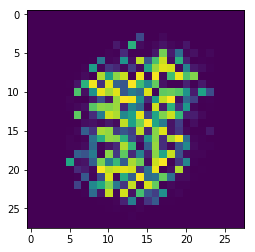

[Epoch 14/20] [Batch 0/937] [D loss: 0.701386] [G loss: 0.689943]
[Epoch 14/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.685904]
[Epoch 14/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.684076]
[Epoch 14/20] [Batch 3/937] [D loss: 0.701915] [G loss: 0.682004]
[Epoch 14/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.669385]
[Epoch 14/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.666661]
[Epoch 14/20] [Batch 6/937] [D loss: 0.701931] [G loss: 0.665451]
[Epoch 14/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.670485]
[Epoch 14/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.668931]
[Epoch 14/20] [Batch 9/937] [D loss: 0.700630] [G loss: 0.667287]
[Epoch 14/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.685009]
[Epoch 14/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.682987]
[Epoch 14/20] [Batch 12/937] [D loss: 0.700685] [G loss: 0.680657]
[Epoch 14/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.694478]
[Epoch 14/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.692

[Epoch 14/20] [Batch 120/937] [D loss: 0.700900] [G loss: 0.704972]
[Epoch 14/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.724492]
[Epoch 14/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.719748]
[Epoch 14/20] [Batch 123/937] [D loss: 0.699257] [G loss: 0.719694]
[Epoch 14/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.723063]
[Epoch 14/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.727481]
[Epoch 14/20] [Batch 126/937] [D loss: 0.698118] [G loss: 0.721943]
[Epoch 14/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.726489]
[Epoch 14/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.725322]
[Epoch 14/20] [Batch 129/937] [D loss: 0.697001] [G loss: 0.722081]
[Epoch 14/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.719966]
[Epoch 14/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.718007]
[Epoch 14/20] [Batch 132/937] [D loss: 0.695805] [G loss: 0.716017]
[Epoch 14/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.718464]
[Epoch 14/20] [Batch 134/937] [D loss: 

[Epoch 14/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.676156]
[Epoch 14/20] [Batch 240/937] [D loss: 0.699571] [G loss: 0.674249]
[Epoch 14/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.687531]
[Epoch 14/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.686713]
[Epoch 14/20] [Batch 243/937] [D loss: 0.703018] [G loss: 0.684213]
[Epoch 14/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.710801]
[Epoch 14/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.705499]
[Epoch 14/20] [Batch 246/937] [D loss: 0.700855] [G loss: 0.702221]
[Epoch 14/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.696642]
[Epoch 14/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.694673]
[Epoch 14/20] [Batch 249/937] [D loss: 0.702814] [G loss: 0.687299]
[Epoch 14/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.685568]
[Epoch 14/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.683048]
[Epoch 14/20] [Batch 252/937] [D loss: 0.703835] [G loss: 0.679740]
[Epoch 14/20] [Batch 253/937] [D loss: 

[Epoch 14/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.667274]
[Epoch 14/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.666185]
[Epoch 14/20] [Batch 360/937] [D loss: 0.699738] [G loss: 0.665492]
[Epoch 14/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.686426]
[Epoch 14/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.684857]
[Epoch 14/20] [Batch 363/937] [D loss: 0.699172] [G loss: 0.684116]
[Epoch 14/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.716843]
[Epoch 14/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.716148]
[Epoch 14/20] [Batch 366/937] [D loss: 0.698031] [G loss: 0.715244]
[Epoch 14/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.726604]
[Epoch 14/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.724425]
[Epoch 14/20] [Batch 369/937] [D loss: 0.697969] [G loss: 0.723862]
[Epoch 14/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.689418]
[Epoch 14/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.688652]
[Epoch 14/20] [Batch 372/937] [D loss:

[Epoch 14/20] [Batch 477/937] [D loss: 0.712728] [G loss: 0.676571]
[Epoch 14/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.713382]
[Epoch 14/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.706823]
[Epoch 14/20] [Batch 480/937] [D loss: 0.712114] [G loss: 0.710293]
[Epoch 14/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.694529]
[Epoch 14/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.691279]
[Epoch 14/20] [Batch 483/937] [D loss: 0.711478] [G loss: 0.688687]
[Epoch 14/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.657925]
[Epoch 14/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.652985]
[Epoch 14/20] [Batch 486/937] [D loss: 0.710921] [G loss: 0.652552]
[Epoch 14/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.666630]
[Epoch 14/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.665856]
[Epoch 14/20] [Batch 489/937] [D loss: 0.709112] [G loss: 0.666583]
[Epoch 14/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.721072]
[Epoch 14/20] [Batch 491/937] [D loss: 

[Epoch 14/20] [Batch 596/937] [D loss: -1.000000] [G loss: 0.711979]
[Epoch 14/20] [Batch 597/937] [D loss: 0.704498] [G loss: 0.710531]
[Epoch 14/20] [Batch 598/937] [D loss: -1.000000] [G loss: 0.676228]
[Epoch 14/20] [Batch 599/937] [D loss: -1.000000] [G loss: 0.675946]
[Epoch 14/20] [Batch 600/937] [D loss: 0.706221] [G loss: 0.676139]
[Epoch 14/20] [Batch 601/937] [D loss: -1.000000] [G loss: 0.643272]
[Epoch 14/20] [Batch 602/937] [D loss: -1.000000] [G loss: 0.639207]
[Epoch 14/20] [Batch 603/937] [D loss: 0.707990] [G loss: 0.640120]
[Epoch 14/20] [Batch 604/937] [D loss: -1.000000] [G loss: 0.653249]
[Epoch 14/20] [Batch 605/937] [D loss: -1.000000] [G loss: 0.648775]
[Epoch 14/20] [Batch 606/937] [D loss: 0.710105] [G loss: 0.646293]
[Epoch 14/20] [Batch 607/937] [D loss: -1.000000] [G loss: 0.690149]
[Epoch 14/20] [Batch 608/937] [D loss: -1.000000] [G loss: 0.688801]
[Epoch 14/20] [Batch 609/937] [D loss: 0.716827] [G loss: 0.683042]
[Epoch 14/20] [Batch 610/937] [D loss: 

[Epoch 14/20] [Batch 715/937] [D loss: -1.000000] [G loss: 0.720055]
[Epoch 14/20] [Batch 716/937] [D loss: -1.000000] [G loss: 0.716239]
[Epoch 14/20] [Batch 717/937] [D loss: 0.707468] [G loss: 0.715504]
[Epoch 14/20] [Batch 718/937] [D loss: -1.000000] [G loss: 0.738041]
[Epoch 14/20] [Batch 719/937] [D loss: -1.000000] [G loss: 0.736702]
[Epoch 14/20] [Batch 720/937] [D loss: 0.706359] [G loss: 0.736336]
[Epoch 14/20] [Batch 721/937] [D loss: -1.000000] [G loss: 0.733575]
[Epoch 14/20] [Batch 722/937] [D loss: -1.000000] [G loss: 0.732734]
[Epoch 14/20] [Batch 723/937] [D loss: 0.705912] [G loss: 0.732631]
[Epoch 14/20] [Batch 724/937] [D loss: -1.000000] [G loss: 0.719797]
[Epoch 14/20] [Batch 725/937] [D loss: -1.000000] [G loss: 0.718941]
[Epoch 14/20] [Batch 726/937] [D loss: 0.704902] [G loss: 0.717917]
[Epoch 14/20] [Batch 727/937] [D loss: -1.000000] [G loss: 0.720407]
[Epoch 14/20] [Batch 728/937] [D loss: -1.000000] [G loss: 0.718749]
[Epoch 14/20] [Batch 729/937] [D loss:

[Epoch 14/20] [Batch 834/937] [D loss: 0.716227] [G loss: 0.623771]
[Epoch 14/20] [Batch 835/937] [D loss: -1.000000] [G loss: 0.617472]
[Epoch 14/20] [Batch 836/937] [D loss: -1.000000] [G loss: 0.614940]
[Epoch 14/20] [Batch 837/937] [D loss: 0.711853] [G loss: 0.611963]
[Epoch 14/20] [Batch 838/937] [D loss: -1.000000] [G loss: 0.608404]
[Epoch 14/20] [Batch 839/937] [D loss: -1.000000] [G loss: 0.608117]
[Epoch 14/20] [Batch 840/937] [D loss: 0.710196] [G loss: 0.605603]
[Epoch 14/20] [Batch 841/937] [D loss: -1.000000] [G loss: 0.621637]
[Epoch 14/20] [Batch 842/937] [D loss: -1.000000] [G loss: 0.621110]
[Epoch 14/20] [Batch 843/937] [D loss: 0.705896] [G loss: 0.622906]
[Epoch 14/20] [Batch 844/937] [D loss: -1.000000] [G loss: 0.641500]
[Epoch 14/20] [Batch 845/937] [D loss: -1.000000] [G loss: 0.636725]
[Epoch 14/20] [Batch 846/937] [D loss: 0.707096] [G loss: 0.634437]
[Epoch 14/20] [Batch 847/937] [D loss: -1.000000] [G loss: 0.635168]
[Epoch 14/20] [Batch 848/937] [D loss: 

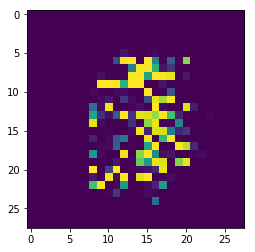

[Epoch 15/20] [Batch 0/937] [D loss: 0.685158] [G loss: 0.741356]
[Epoch 15/20] [Batch 1/937] [D loss: -1.000000] [G loss: 0.754936]
[Epoch 15/20] [Batch 2/937] [D loss: -1.000000] [G loss: 0.750608]
[Epoch 15/20] [Batch 3/937] [D loss: 0.684581] [G loss: 0.748678]
[Epoch 15/20] [Batch 4/937] [D loss: -1.000000] [G loss: 0.752955]
[Epoch 15/20] [Batch 5/937] [D loss: -1.000000] [G loss: 0.747501]
[Epoch 15/20] [Batch 6/937] [D loss: 0.684043] [G loss: 0.744166]
[Epoch 15/20] [Batch 7/937] [D loss: -1.000000] [G loss: 0.770820]
[Epoch 15/20] [Batch 8/937] [D loss: -1.000000] [G loss: 0.764161]
[Epoch 15/20] [Batch 9/937] [D loss: 0.687761] [G loss: 0.759157]
[Epoch 15/20] [Batch 10/937] [D loss: -1.000000] [G loss: 0.739807]
[Epoch 15/20] [Batch 11/937] [D loss: -1.000000] [G loss: 0.730682]
[Epoch 15/20] [Batch 12/937] [D loss: 0.688586] [G loss: 0.733647]
[Epoch 15/20] [Batch 13/937] [D loss: -1.000000] [G loss: 0.708915]
[Epoch 15/20] [Batch 14/937] [D loss: -1.000000] [G loss: 0.704

[Epoch 15/20] [Batch 120/937] [D loss: 0.708952] [G loss: 0.689435]
[Epoch 15/20] [Batch 121/937] [D loss: -1.000000] [G loss: 0.716408]
[Epoch 15/20] [Batch 122/937] [D loss: -1.000000] [G loss: 0.705360]
[Epoch 15/20] [Batch 123/937] [D loss: 0.720745] [G loss: 0.694059]
[Epoch 15/20] [Batch 124/937] [D loss: -1.000000] [G loss: 0.692635]
[Epoch 15/20] [Batch 125/937] [D loss: -1.000000] [G loss: 0.678006]
[Epoch 15/20] [Batch 126/937] [D loss: 0.725889] [G loss: 0.676300]
[Epoch 15/20] [Batch 127/937] [D loss: -1.000000] [G loss: 0.652020]
[Epoch 15/20] [Batch 128/937] [D loss: -1.000000] [G loss: 0.648723]
[Epoch 15/20] [Batch 129/937] [D loss: 0.725127] [G loss: 0.640975]
[Epoch 15/20] [Batch 130/937] [D loss: -1.000000] [G loss: 0.680044]
[Epoch 15/20] [Batch 131/937] [D loss: -1.000000] [G loss: 0.672441]
[Epoch 15/20] [Batch 132/937] [D loss: 0.741287] [G loss: 0.666785]
[Epoch 15/20] [Batch 133/937] [D loss: -1.000000] [G loss: 0.706196]
[Epoch 15/20] [Batch 134/937] [D loss: 

[Epoch 15/20] [Batch 239/937] [D loss: -1.000000] [G loss: 0.681485]
[Epoch 15/20] [Batch 240/937] [D loss: 0.711218] [G loss: 0.679813]
[Epoch 15/20] [Batch 241/937] [D loss: -1.000000] [G loss: 0.717895]
[Epoch 15/20] [Batch 242/937] [D loss: -1.000000] [G loss: 0.716295]
[Epoch 15/20] [Batch 243/937] [D loss: 0.709618] [G loss: 0.713497]
[Epoch 15/20] [Batch 244/937] [D loss: -1.000000] [G loss: 0.706366]
[Epoch 15/20] [Batch 245/937] [D loss: -1.000000] [G loss: 0.710100]
[Epoch 15/20] [Batch 246/937] [D loss: 0.708746] [G loss: 0.708378]
[Epoch 15/20] [Batch 247/937] [D loss: -1.000000] [G loss: 0.679837]
[Epoch 15/20] [Batch 248/937] [D loss: -1.000000] [G loss: 0.677075]
[Epoch 15/20] [Batch 249/937] [D loss: 0.708032] [G loss: 0.676439]
[Epoch 15/20] [Batch 250/937] [D loss: -1.000000] [G loss: 0.665349]
[Epoch 15/20] [Batch 251/937] [D loss: -1.000000] [G loss: 0.661091]
[Epoch 15/20] [Batch 252/937] [D loss: 0.705832] [G loss: 0.660976]
[Epoch 15/20] [Batch 253/937] [D loss: 

[Epoch 15/20] [Batch 358/937] [D loss: -1.000000] [G loss: 0.719994]
[Epoch 15/20] [Batch 359/937] [D loss: -1.000000] [G loss: 0.717041]
[Epoch 15/20] [Batch 360/937] [D loss: 0.700873] [G loss: 0.714026]
[Epoch 15/20] [Batch 361/937] [D loss: -1.000000] [G loss: 0.733103]
[Epoch 15/20] [Batch 362/937] [D loss: -1.000000] [G loss: 0.728089]
[Epoch 15/20] [Batch 363/937] [D loss: 0.704392] [G loss: 0.724652]
[Epoch 15/20] [Batch 364/937] [D loss: -1.000000] [G loss: 0.709924]
[Epoch 15/20] [Batch 365/937] [D loss: -1.000000] [G loss: 0.706064]
[Epoch 15/20] [Batch 366/937] [D loss: 0.705902] [G loss: 0.703620]
[Epoch 15/20] [Batch 367/937] [D loss: -1.000000] [G loss: 0.690595]
[Epoch 15/20] [Batch 368/937] [D loss: -1.000000] [G loss: 0.687582]
[Epoch 15/20] [Batch 369/937] [D loss: 0.701665] [G loss: 0.685329]
[Epoch 15/20] [Batch 370/937] [D loss: -1.000000] [G loss: 0.699784]
[Epoch 15/20] [Batch 371/937] [D loss: -1.000000] [G loss: 0.698148]
[Epoch 15/20] [Batch 372/937] [D loss:

[Epoch 15/20] [Batch 477/937] [D loss: 0.692675] [G loss: 0.679919]
[Epoch 15/20] [Batch 478/937] [D loss: -1.000000] [G loss: 0.681398]
[Epoch 15/20] [Batch 479/937] [D loss: -1.000000] [G loss: 0.675797]
[Epoch 15/20] [Batch 480/937] [D loss: 0.689021] [G loss: 0.675630]
[Epoch 15/20] [Batch 481/937] [D loss: -1.000000] [G loss: 0.691254]
[Epoch 15/20] [Batch 482/937] [D loss: -1.000000] [G loss: 0.683997]
[Epoch 15/20] [Batch 483/937] [D loss: 0.689675] [G loss: 0.682776]
[Epoch 15/20] [Batch 484/937] [D loss: -1.000000] [G loss: 0.700391]
[Epoch 15/20] [Batch 485/937] [D loss: -1.000000] [G loss: 0.698898]
[Epoch 15/20] [Batch 486/937] [D loss: 0.689216] [G loss: 0.698120]
[Epoch 15/20] [Batch 487/937] [D loss: -1.000000] [G loss: 0.686459]
[Epoch 15/20] [Batch 488/937] [D loss: -1.000000] [G loss: 0.684179]
[Epoch 15/20] [Batch 489/937] [D loss: 0.686772] [G loss: 0.684531]
[Epoch 15/20] [Batch 490/937] [D loss: -1.000000] [G loss: 0.666959]
[Epoch 15/20] [Batch 491/937] [D loss: 

In [ ]:
# training
n_epochs = 20

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        valid = torch.empty((batch_size, 1), dtype=torch.float).fill_(1)
        fake = torch.empty((batch_size, 1), dtype=torch.float).fill_(0)
        
        # train generator
        optimizer_G.zero_grad()
        z = torch.randn((batch_size, latent_dim))
        
        # generate images
        gen_imgs = generator(z)
        
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()
        
        # train discriminator every other n step 
        if i % 3 == 0:
            optimizer_D.zero_grad()

            real_loss = adversarial_loss(discriminator(imgs), valid)
            fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
            d_loss = (real_loss + fake_loss) / 2

            d_loss.backward()
            optimizer_D.step()
        else:
            d_loss = torch.tensor(-1)
        
        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )
    
    print('Generated image at epoch {}'.format(epoch))
    sample_image = gen_imgs.detach()[0].squeeze()
    plt.imshow(sample_image)
    plt.show()